# Аналитика данных компании Gectaro #

# Описание проекта #

Анализ причин оттока клиентов сервиса Gectaro.   
Gectaro – облачный сервис для автоматизации управления строительством и ремонтом.    
Компания продает софт с платной подпиской в сегменте B2B (наиболее частый срок подписки 12-24 месяца), предназначенный для управления процессами в сфере строительства и ремонта.    
Основная проблема – это уход из сервиса большого количества подписчиков, партнеров и не продление подписки (как правило снижение пользовательской активности предшествует отказу от подписки).
</br>
</br>
**Цель проекта**    
Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации.     
Для этого предлагается определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.


# План реализации: #


1. Загрузка и первичная обработка информации
3. Исследовательский анализ данных
4. Выводы
5. Подготовка презентации


In [ ]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Настроим отображение данных
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Предобработка данных #

In [ ]:
# Сохраним данные из файлов в переменные activities, billing, companies, people
try:
    activities, billing, companies, people = (
                            pd.read_csv('./content/drive/MyDrive/Datasets/gectaro/activities.csv', sep=',', index_col=0),
                            pd.read_csv('./content/drive/MyDrive/Datasets/gectaro/billing.csv', sep=',', index_col=0),
                            pd.read_csv('./content/drive/MyDrive/Datasets/gectaro/companies.csv', sep=',', index_col=0),
                            pd.read_csv('./content/drive/MyDrive/Datasets/gectaro/people.csv', sep=',', index_col=0)
                            )
except:
    activities, billing, companies, people = (
                            pd.read_csv('/content/drive/MyDrive/Datasets/gectaro/activities.csv', sep=',', index_col=0),
                            pd.read_csv('/content/drive/MyDrive/Datasets/gectaro/billing.csv', sep=',', index_col=0),
                            pd.read_csv('/content/drive/MyDrive/Datasets/gectaro/companies.csv', sep=',', index_col=0),
                            pd.read_csv('/content/drive/MyDrive/Datasets/gectaro/people.csv', sep=',', index_col=0)
                            )

In [ ]:
# зададим функцию для предобработки данных
def preprocessing(dataset):
    dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns]
    print(dataset.head())
    print()
    print(dataset.info())
    print()
    print(dataset.isna().sum())
    print()
    if dataset.duplicated().sum() == 0:
        print('Явных дубликатов не обнаружено')
    else:
        print(dataset.duplicated().sum())

## Датасет activities

In [ ]:
preprocessing(activities)

   company_id                      month  company-month-billing  \
0           1  2019-09-01 00:00:00+00:00                   1.00   
1           1  2019-12-01 00:00:00+00:00                   1.00   
2           1  2020-04-01 00:00:00+00:00                   4.00   
3           1  2020-07-01 00:00:00+00:00                   1.00   
4          21  2020-01-01 00:00:00+00:00                   3.00   

   company-month-stocks  company-month-backups  company-month-projects  \
0                  0.00                   0.00                    7.00   
1                  0.00                   0.00                    2.00   
2                  1.00                   0.00                    1.00   
3                  7.00                   3.00                    5.00   
4                  0.00                   0.00                    1.00   

   company-month-contractors  company-month-resource_orders  
0                       0.00                           0.00  
1                       1.00

In [ ]:
len(activities['month'].unique())/12

5.25

In [ ]:
min(activities['month'])

'2019-01-01 00:00:00+00:00'

In [ ]:
max(activities['month'])

'2024-03-01 00:00:00+00:00'

Данные о действиях компаний за 5 лет и 2 месяца, начиная с 1 января 2019 до 1 марта 2024    
Количество компаний - 716    
Пропусков нет.
Явных дубликатов нет.       
Запись месяца можно сократить до вида ммддгг (без минут и секунд).    
Счета, количество складов, бэкапы, проекты, контрагенты, заказы материалов - перевести в целочисленные значения.  




Переименуем столбцы для лучшей читаемости

In [ ]:
activities.columns = ['company_id', 'month', 'billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']
activities.sample(4)

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders
3462,4311,2021-09-01 00:00:00+00:00,0.00,1.00,0.00,0.00,2.00,5.00
4474,6305,2022-10-01 00:00:00+00:00,0.00,12.00,0.00,8.00,45.00,21.00
963,4608,2021-11-01 00:00:00+00:00,3.00,19.00,0.00,14.00,20.00,3.00
6143,3139,2021-07-01 00:00:00+00:00,0.00,0.00,0.00,0.00,10.00,0.00



Переведем числовые значения в целочисленный формат



In [ ]:
activities_names = ['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']
for name in activities_names:
    activities[name] = activities[name].astype (int)
activities.sample()

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders
5254,9243,2024-03-01 00:00:00+00:00,0,2,0,3,2,1


Так как в данном датасете мы рассматриваем месячную активность компаний, переведем значение month в соответствующее значение (без указания времени)

In [ ]:
activities['month'] = pd.to_datetime(activities['month']).dt.date
activities.sample(1)

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders
4849,7269,2023-02-01,0,4,0,2,3,1


In [ ]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_id       6316 non-null   int64 
 1   month            6316 non-null   object
 2   billing          6316 non-null   int64 
 3   stocks           6316 non-null   int64 
 4   backups          6316 non-null   int64 
 5   projects         6316 non-null   int64 
 6   contractors      6316 non-null   int64 
 7   resource_orders  6316 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 444.1+ KB


## Датасет billing

In [ ]:
preprocessing(billing)

    unnamed:_0    id  user_id  company_id  billing_tariff_id  payed_until  \
4            4  3050      567         512                  3   1640153302   
6            6  3051     2861        2474                  7   1640131200   
16          16  3059     1902        1645                  2   1616577484   
18          18  3065     2352        2035                  7   1643500799   
24          24  3062     1074         926                  3   1611964800   

    is_payed  created_at  updated_at  billing_tariff_price_id comment  \
4      False  1608617302  1608617302                    12.00     NaN   
6       True  1608626162  1608626181                    23.00     NaN   
16     False  1608801484  1608801484                     6.00     NaN   
18     False  1608883175  1608883175                    23.00     NaN   
24      True  1608814072  1608899674                     9.00     NaN   

           pay_date  
4               NaN  
6  1,608,626,181.00  
16              NaN  
18        

In [ ]:
len(billing['company_id'].unique())

1841

3480 записей о платежах 1841 компаний, но при этом индекс указывает как минимум на 18953 изначальных записей. Это говорит о том, что часть данных либо была удалена, либо эта выгрузка является выборкой из какого-то более полного датаcета. Для дальнейшего исследования эти индексы не являются существенными, так что можно их сбросить.
Колонка id скорее всего также указывает на то что это выборка из более полного набора данных. Возможно, отсортированная по какому-либо признаку.     
Колонка unnamed_0 лишняя, её следует удалить.     
Явных дубликатов нет.    
Пропуски в колонках комментарии и дата платежа.
payed_untill, created_at, updated_at, pay_date перевести в человекочитаемые даты в формате ггммддвв        


In [ ]:
billing = billing.reset_index(drop = True)
billing.head(3)

,unnamed:_0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.00,NaN,NaN
1,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.00,NaN,"1,608,626,181.00"
2,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.00,NaN,NaN


In [ ]:
billing['created_at'] = pd.to_datetime(billing['created_at'],unit='s')
billing['updated_at'] = pd.to_datetime(billing['updated_at'],unit='s')
billing['payed_until'] = pd.to_datetime(billing['payed_until'],unit='s')
billing['pay_date'] = pd.to_datetime(billing['pay_date'],unit='s')
billing.sample()
# billing['payed_until'].describe()

,unnamed:_0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
665,2189,4231,3903,3244,6,2023-07-05,True,2021-05-24 12:39:30,2021-05-31 13:27:00,19.00,NaN,2021-06-05


In [ ]:
billing = billing.drop('unnamed:_0', axis=1)

In [ ]:
billing['billing_tariff_price_id'] = billing['billing_tariff_price_id'].astype (int)

In [ ]:
(billing.sort_values(by='id')).head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
733,376,342,308,2,2019-10-23 23:59:59,False,2019-07-23 09:32:39,2019-07-23 09:32:39,6,NaN,NaT
734,378,366,330,2,2021-09-01 23:59:59,False,2019-07-23 11:43:26,2019-07-23 11:43:26,6,NaN,NaT
735,379,366,330,2,2021-07-01 23:59:59,False,2019-07-23 11:45:57,2019-07-23 11:45:57,1,NaN,NaT
780,380,1,1,3,2020-11-29 00:00:00,True,2019-07-23 15:48:05,2020-07-25 09:37:48,9,NaN,NaT
748,382,14,13,2,2019-12-29 00:00:00,False,2019-07-24 08:59:26,2019-12-14 14:19:08,6,NaN,NaT


По всей видимости, столбец id отражает некоторую выборку компаний, отсортированных по дате создания записи. Возможно, из выборки были сключены компании с тестовыми тарифами. Для дальнейшего анализа эта колонка нам не пригодится. Удалим её.

In [ ]:
billing = billing.drop('id', axis=1)
billing.head(3)

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT
1,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23,NaN,2020-12-22 08:36:21
2,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6,NaN,NaT


In [ ]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  3480 non-null   int64         
 1   company_id               3480 non-null   int64         
 2   billing_tariff_id        3480 non-null   int64         
 3   payed_until              3480 non-null   datetime64[ns]
 4   is_payed                 3480 non-null   bool          
 5   created_at               3480 non-null   datetime64[ns]
 6   updated_at               3480 non-null   datetime64[ns]
 7   billing_tariff_price_id  3480 non-null   int64         
 8   comment                  745 non-null    object        
 9   pay_date                 1108 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), int64(4), object(1)
memory usage: 248.2+ KB


## Датасет companies

In [ ]:
preprocessing(companies)

     id working_direction  employer_count_interval  created_at  updated_at  \
19  514                 -                     1.00  1571316635  1670298314   
57  383     Строительство                     2.00  1564142565  1676550050   
69  495                 -                     1.00  1570535695  1598281714   
75  724                 -                     1.00  1579514393  1670298294   
99  471                 -                     1.00  1569328017  1670298360   

    billing_tariff_id  billing_is_over  
19               4.00             True  
57               7.00            False  
69               2.00            False  
75               4.00             True  
99               7.00             True  

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_directi

723 записи, но при этом индексы 19-17972, т.е. часть данных либо удалена, либо это подвыборка более полного датасета. Возможно, это как раз бесплатные тестовые тарифы. Если это так, то эти записи составляют более 96%.    
Даты в колонках created_at и updated_at надо перевести в человекочитаемый формат.   
employer_count_interval и billing_tariff_id - перевести в целочисленное значение  
Явных дубликатов нет.  
Есть пропуски в working_direction и billing_tariff_id.





In [ ]:
companies['created_at'] = pd.to_datetime(companies['created_at'],unit='s')
companies['updated_at'] = pd.to_datetime(companies['updated_at'],unit='s')

In [ ]:
companies['employer_count_interval'] = companies['employer_count_interval'].astype (int)
companies.sample()

,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
2137,1492,Строительно-монтажные работы,3,2020-07-22 11:57:45,2023-03-13 22:00:02,2.00,True


In [ ]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       723 non-null    int64         
 1   working_direction        720 non-null    object        
 2   employer_count_interval  723 non-null    int64         
 3   created_at               723 non-null    datetime64[ns]
 4   updated_at               723 non-null    datetime64[ns]
 5   billing_tariff_id        716 non-null    float64       
 6   billing_is_over          723 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 40.2+ KB


## Датасет people

In [ ]:
preprocessing(people)

      id  company_id  user_id  role_id  created_at  updated_at  is_deleted  \
2   6601         495      NaN     7133  1570535962  1570535962        True   
6   7025           1      NaN        1  1594120484  1594120484        True   
7   7165        1255 1,734.00    18085  1595438102  1595439391        True   
10  7130        1470 1,703.00        1  1595234824  1595234824       False   
17  7163        1492 1,731.00        1  1595429211  1598540644        True   

         deleted_at  
2  1,594,066,768.00  
6  1,594,120,488.00  
7  1,633,960,082.00  
10              NaN  
17 1,620,195,318.00  

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   upda

In [ ]:
len(people['company_id'].unique())

712

Датасет содержит 5095 записей о сотрудниках 712 компаний, пользователей сервиса Гектаро.     
При этом индексы 2-17054.
Это говорит о том, что часть данных либо была удалена, либо эта выгрузка является выборкой из какого-то более полного датафрейма.    
Колонки created_at, updated_at и deleted_at привести в человекочитаемый формат    
Пропуски в колонке deleted_at и user_id - изучить

In [ ]:
people['created_at'] = pd.to_datetime(people['created_at'],unit='s')
people['updated_at'] = pd.to_datetime(people['updated_at'],unit='s')
people['deleted_at'] = pd.to_datetime(people['deleted_at'],unit='s')
people.sample()

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
10524,15300,4799,"8,139.00",67971,2022-06-17 13:48:57,2022-06-20 09:50:26,False,NaT


In [ ]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5095 non-null   int64         
 1   company_id  5095 non-null   int64         
 2   user_id     3813 non-null   float64       
 3   role_id     5095 non-null   int64         
 4   created_at  5095 non-null   datetime64[ns]
 5   updated_at  5095 non-null   datetime64[ns]
 6   is_deleted  5095 non-null   bool          
 7   deleted_at  2180 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](3), float64(1), int64(3)
memory usage: 323.4 KB


## Вывод

Были загружены и первично обработаны следующие датасеты:

**activities**
- датасет содержит 6316 записей о месячных активностях 716 компаний, пользователей сервиса Гектаро
- колонки, содержащие даты приведены в соответствующий формат
- данные о счетах, количестве складов, бэкапов, проектов, контрагентов и заказах материалов переведены в целочисленный формат
- пропусков нет
- явных дубликатов не обнаружено

**billing**     
- датасет содержит 3480 записей о платежах 1841 компании, пользователей сервиса Гектаро
-  этом индекс указывает как минимум на 18953 изначальных записей.     
Это говорит о том, что часть данных либо была удалена, либо эта выгрузка является выборкой из какого-то более полного датафрейма. Т.к. дальнейшего исследования эти индексы не являются существенными, их решено было сбросить.     
- столбец id, по всей видимости, отражает некоторую выборку компаний, отсортированных по дате создания. Возможно, из выборки были сключены компании с тестовыми тарифами.     
Т.к. для дальнейшего анализа эта колонка не представляет интереса, было решено её удалить.       
- удалена колонка unnamed_0, содержащая старые индексы
- явных дубликатов не обнаружено     
- имеются пропуски в колонках comment и pay_date             
- колонки, содержащие даты приведены в соответствующий формат         

**companies**      
- датасет содержит 723 записи о компаниях, пользователях сервиса Гектаро.
- при этом индексы 19-17972, т.е. часть данных либо удалена, либо это подвыборка более полного датасета. Возможно, это как раз бесплатные тестовые тарифы. Если это так, то эти записи составляют более 96%.    
- колонки, содержащие даты приведены в соответствующий формат    
- явных дубликатов не обнаружено   
- имеются пропуски в колонках working_direction и billing_tariff_id.

**people**     
- датасет содержит 5095 записей о сотрудниках 712 компаний, пользователей сервиса Гектаро.     
- при этом индексы 2-17054, т.е. часть данных либо удалена, либо это подвыборка более полного датасета.
- колонки, содержащие даты приведены в соответствующий формат    
- имеются пропуски в колонках deleted_at и user_id

# Исследовательский анализ

Посмотрим на временные рамки всех датасетов

In [ ]:
print('''
billing
Самая ранняя запись: {}
Самая поздняя запись: {}
'''
.format(billing['created_at'].min(), billing['created_at'].max()))

print('''
activities
Самая ранняя запись: {}
Самая поздняя запись: {}
'''
.format(activities['month'].min(), activities['month'].max()))

print('''
companies
Самая ранняя запись: {}
Самая поздняя запись: {}
'''
.format(companies['created_at'].min(), companies['created_at'].max()))

print('''
people
Самая ранняя запись: {}
Самая поздняя запись: {}
'''
.format(people['created_at'].min(), people['created_at'].max()))


billing
Самая ранняя запись: 2019-07-23 09:32:39
Самая поздняя запись: 2024-03-13 10:24:06


activities
Самая ранняя запись: 2019-01-01
Самая поздняя запись: 2024-03-01


companies
Самая ранняя запись: 2019-01-23 14:00:51
Самая поздняя запись: 2024-02-07 12:56:09


people
Самая ранняя запись: 2019-01-23 14:00:51
Самая поздняя запись: 2023-12-13 14:41:23



Почти все датасеты отличаются временными промежутками.

## billing

### Анализ пропусков

In [ ]:
pd.DataFrame(round(billing.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
company_id,0.000000
billing_tariff_id,0.000000
payed_until,0.000000
is_payed,0.000000
created_at,0.000000
updated_at,0.000000
billing_tariff_price_id,0.000000
comment,78.600000
pay_date,68.200000


Больше всего пропусков в колонке comment, они составляют более 78%. Также, много пропусков в колонке pay_date, их доля составляет 68%. Посмотрим на пропуски подробнее.

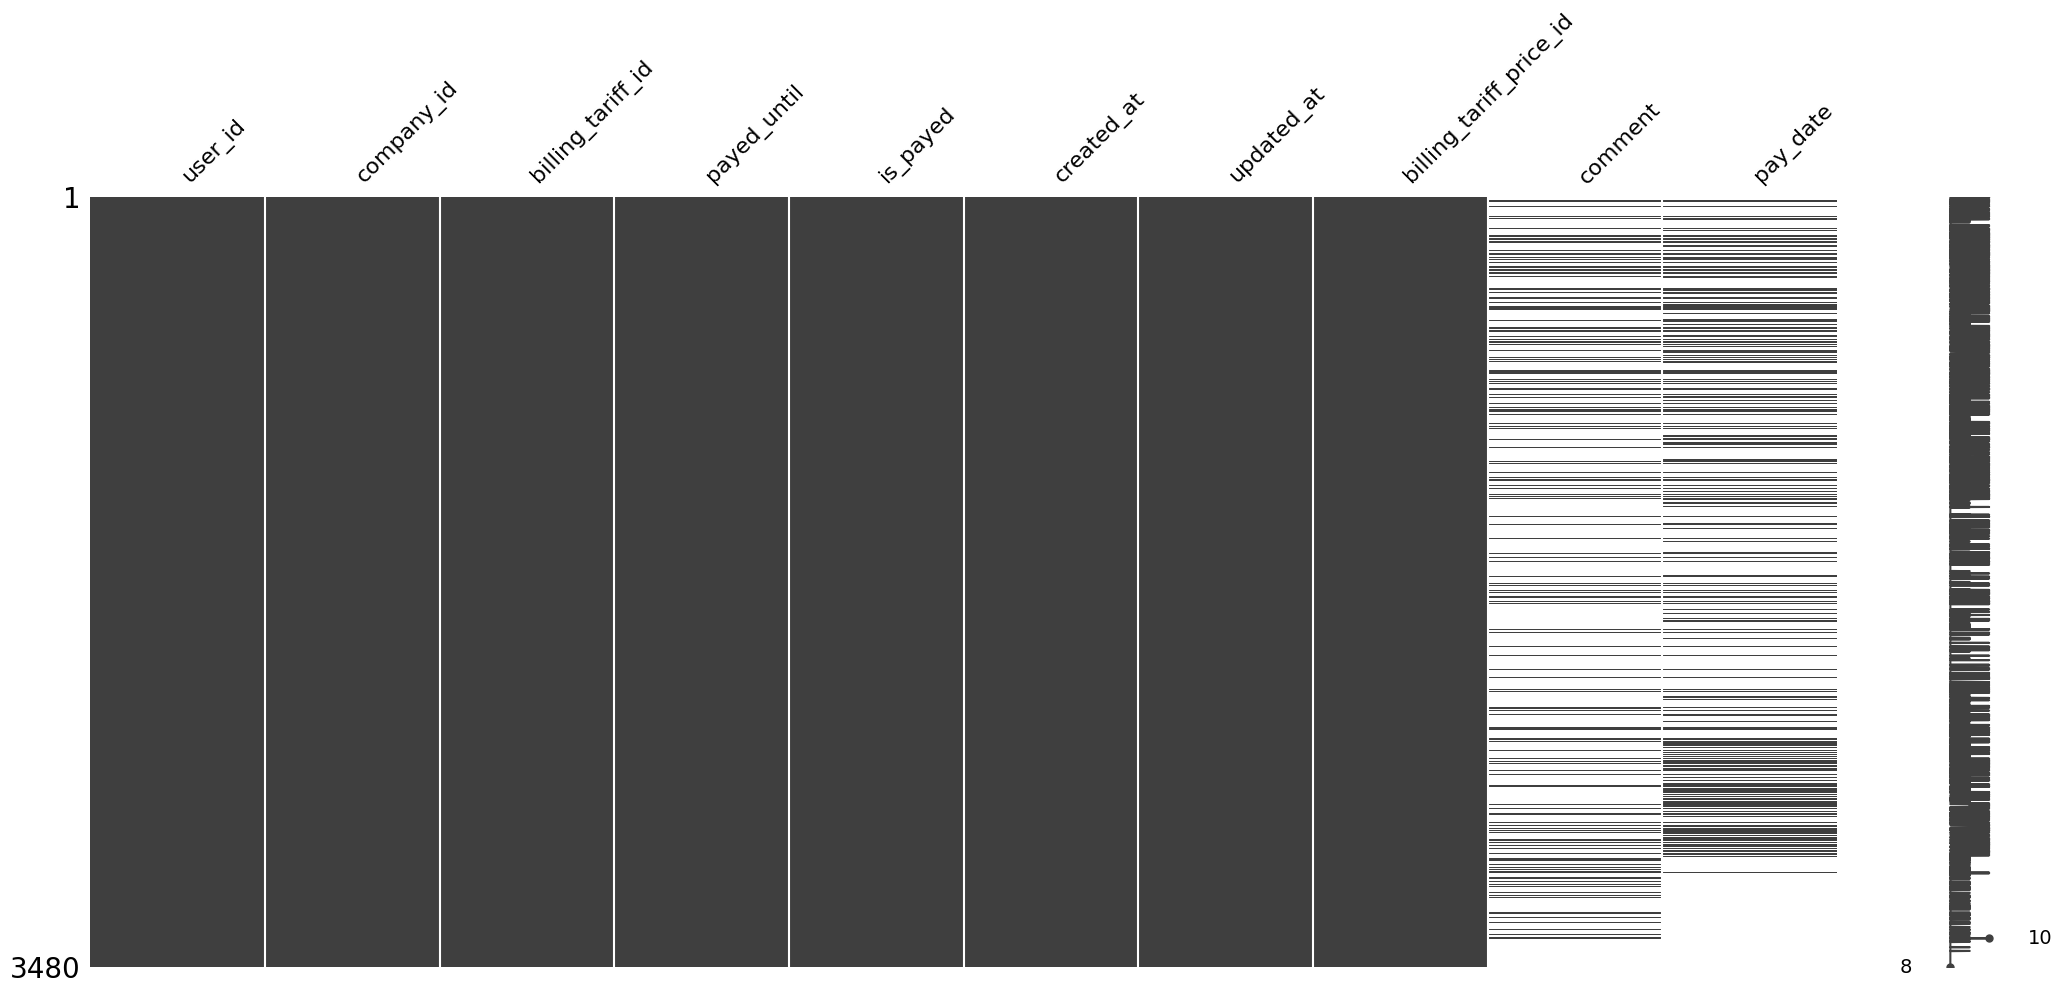

In [ ]:
msno.matrix(billing.sort_values(by='created_at', ascending=False));

Мы видим некоторые закономерности в пропусках. Какое-то время комментарии и даты оплаты не были заполнены вообще. Возможно, в сервисе на тот момент не было этого функционала. Либо часть данных была потеряна из-за технических неполадок.

Исследуем значения колонки комментариев.

In [ ]:
comments = billing[billing['comment'].notnull()]
comments.head()

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
6,2707,2353,2,2021-06-30,True,2020-12-29 07:31:09,2020-12-30 11:48:13,7,"30,12 - пришла оплата",2020-12-29
11,1134,981,7,2021-02-11,True,2020-12-30 08:38:35,2021-02-10 06:46:28,20,"попросил продлить на 1 день, оплатит",2020-12-30
13,4451,3633,7,2021-08-13,True,2021-07-21 09:04:55,2021-08-11 10:55:48,23,"оплата пришла 5,08\r\nПереоткрыла другой лк",2021-08-05
15,2920,2507,4,2021-06-23,False,2020-12-23 10:01:04,2020-12-23 12:05:38,15,"23,12 - оплатили, ожидаем в январе сообщение об активации тарифа",2020-12-25
21,4857,3917,2,2021-09-06,True,2021-08-05 14:35:46,2021-09-06 13:24:24,35,"24 + 4 мес\r\n06.09,2021 Возврат",2021-08-06


Комментарии содержат записи в свободной форме. В-основном, они содержат информацию о том, на какой период подписка, сколько бонусных месяев или дней, об отсрочке оплаты и т.п.  

Проверим, всегда ли комментарий сопровождает метку в графе is_payed.

In [ ]:
len(billing.query('comment.notnull() & is_payed == False'))

34

In [ ]:
len(billing.query('comment.notnull() & pay_date.isnull()'))

103

In [ ]:
len(billing.query('comment.notnull() & pay_date.isnull() & is_payed == False'))

19

In [ ]:
(billing.query('comment.notnull() & pay_date.isnull() & is_payed == False')).head()

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
346,641,575,4,2022-03-30,False,2021-03-29 16:29:12,2021-03-30 08:18:40,16,"30,03 активировала",NaT
558,3793,3162,7,2021-11-11,False,2021-05-10 08:44:17,2021-05-11 07:48:25,22,"оплата пришла 11,05,21",NaT
730,5005,4025,7,2022-06-24,False,2021-08-23 15:56:35,2022-06-16 11:30:54,23,16.06.22-7дней,NaT
1019,711,628,7,2020-08-18,False,2020-06-16 13:21:26,2020-08-17 11:37:34,20,"16,07 - пришла оплата на 3900, как продолжение оплаты тарифа",NaT
1125,2093,1812,7,2020-12-23,False,2020-09-22 11:23:56,2022-02-25 11:26:43,21,"Активировать по запросу клиента\r\n25,02,22 - ОФОРМИЛИ ВОЗВРАТ",NaT


Наличие комментария не всегда обозначает проведение платежа. Пропуски могут быть как в колонке is_payed, так и в колонке pay_date, или же в обеих этих колонках, даже при наличии комментария. При этом сами комментарии могут содержать информацию о проведении платежа.



Пропуски в колонке comment скорее всего обусловлены тем, что эта запись не явлется обязательной для заполнения. Доля таких пропусков составляет 78,6%. Т.к. эта колонка не важна для визуализации данных, а содержимое комментариев при необходимости будет просматриваться вручную, целесообразно оставить эти пропуски без изменений.  

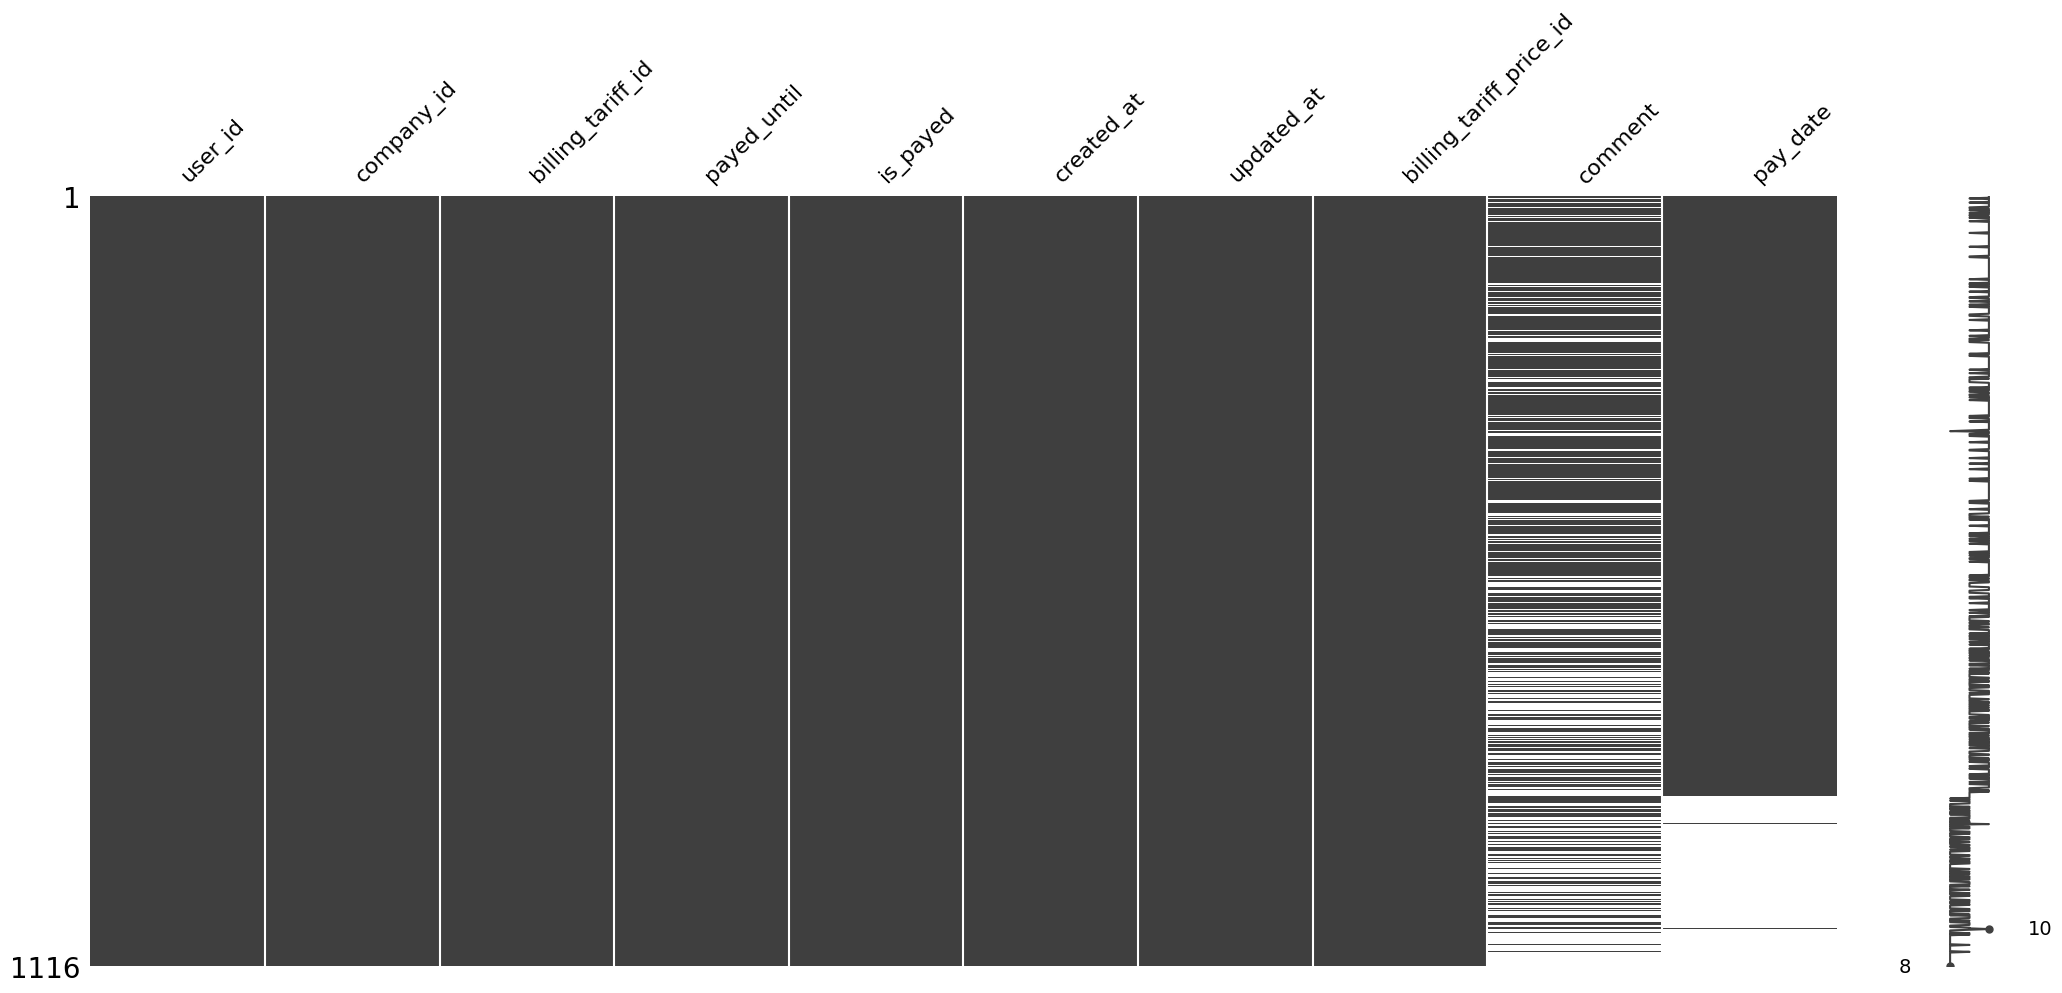

In [ ]:
msno.matrix(billing.query('is_payed == True').sort_values(by='created_at', ascending=False));

In [ ]:
(billing.query('is_payed == True'))['pay_date'].min()

Timestamp('2020-12-16 12:43:27')

Выделив тольоко записи с меткой is_payed, мы смогли увидеть что дата платежа отсутствовала почти в 100% случаев вплоть до 16 декабря 2020 года. Но начиная с этой даты, она присутствует без пропусков.

In [ ]:
billing.query('is_payed == True')['created_at'].min()

Timestamp('2019-07-23 15:48:05')

При этом первая метка is_payed датируется самой ранней датой имеющихся данных.

      
Проверим, насколько частой была ситуация, когда в колонке is_payed стоит True, но при этом pay_date не определена.

In [ ]:
(billing.query('pay_date.isnull() & is_payed == True ').sort_values(by='created_at', ascending=False)).head(3)

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
2204,8540,6526,10,2023-12-07 05:38:28,True,2022-08-15 06:19:18,2022-08-15 06:19:18,33,NaN,NaT
1222,2887,2484,2,2021-06-22 00:00:00,True,2020-12-14 14:02:59,2020-12-14 14:05:18,7,оплатили безналом,NaT
1220,2905,2493,7,2021-03-25 00:00:00,True,2020-12-10 08:05:15,2020-12-10 08:06:59,22,"На 3 мес оплатили 14700 руб, перерегистрировались на владельца",NaT


Попробуем найти случаи, когда дата платежа стоит, но при этом статус оплаты - False

In [ ]:
(billing.query('pay_date.notnull() & is_payed == False').sort_values(by='created_at', ascending=False)).head(3)

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
3477,13378,9841,7,2025-03-13,False,2024-03-12 17:52:29,2024-03-12 17:53:29,23,NaN,2024-03-15
3298,12909,9526,7,2024-12-08,False,2023-12-05 09:32:20,2023-12-05 09:33:13,23,NaN,2023-12-07
3267,12431,9195,7,2024-11-23,False,2023-11-13 09:42:30,2023-11-13 09:45:25,23,NaN,2023-11-22


In [ ]:
len(billing.query('pay_date.notnull() & is_payed == False').sort_values(by='created_at', ascending=False))

237

И такой вариант тоже встречается в 237 случаях, включая недавнее время (март 2024, декабрь 2023)      


Проанализируем возможность заполнения пропусков в колонке pay_date

In [ ]:
temp = billing.query('is_payed == True')

In [ ]:
pd.DataFrame(round(temp.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
company_id,0.000000
billing_tariff_id,0.000000
payed_until,0.000000
is_payed,0.000000
created_at,0.000000
updated_at,0.000000
billing_tariff_price_id,0.000000
comment,36.300000
pay_date,22.000000


Доля незаполненных дат платежа среди записей с подтвержденной оплатой - 22%

Как мы видели в ходе предыущего исследования, в ряде случаев оплата поступает в течение нескольких дней. Сократим даты до месяцев, чтобы не учитывать разность эти несколько дней. Для целей данного исследования точность до дней не представляется существенной.

In [ ]:
temp['created_at'] = temp['created_at'].dt.to_period('M')
temp['updated_at'] = temp['updated_at'].dt.to_period('M')
temp['pay_date'] = temp['pay_date'].dt.to_period('M')

In [ ]:
temp_not_null = temp.query('pay_date.notnull()')

In [ ]:
((len(temp_not_null.query('pay_date == created_at'))*100))/len(temp_not_null)

85.1894374282434

In [ ]:
((len(temp_not_null.query('pay_date == updated_at'))*100))/len(temp_not_null)

70.14925373134328

In [ ]:
((len(temp_not_null.query('created_at == updated_at'))*100))/len(temp_not_null)

59.58668197474167

В 85% случаев месяц оплаты совпадает с месяцем создания записи   
В 70% случаев месяц оплаты совпадает с месяцем обновления записи    
При этом часть данных пересекается, т.к. дата создания записи и дата апдейта в 60% случаев совпадают.
Рассмотрим только те записи, где эти даты различаются:

In [ ]:
temp_not_null_diff = temp_not_null.query('created_at != updated_at')

In [ ]:
((len(temp_not_null_diff.query('pay_date == created_at'))*100))/len(temp_not_null_diff)

63.63636363636363

In [ ]:
((len(temp_not_null_diff.query('pay_date == updated_at'))*100))/len(temp_not_null_diff)

26.420454545454547

In [ ]:
((len(temp_not_null_diff.query('pay_date != updated_at & pay_date != created_at'))*100))/len(temp_not_null_diff)

9.943181818181818

In [ ]:
len(temp_not_null_diff.query('pay_date != updated_at & pay_date != created_at'))

35

In [ ]:
temp_not_null_diff.query('pay_date != updated_at & pay_date != created_at').head(10)

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
78,3254,2774,7,2021-12-31,True,2021-02,2021-08,22,"5.03 - активировали пакет (срок был 6 мес по 3,08)\r\n7,04,21 попросил заморозить, пока нет заказов (срок был по 15,09,21, остался 161 день)\r\n3,06,21 разморозили тариф\r\n14.07 - заморозили тариф обратно (осталось 119 дней), обучение так и не началось\r\n23,07,21 - активировали по 20,11,21\r\nЗапросил возврат дней с 3,06 по 14,07 - т.к. не пользоватлся системой и не просил ее активировать - 41 день обратно вернули - по 31 декабря 21)",2021-03
1400,5462,4334,2,2022-05-18,True,2021-10,2022-05,7,"10,11 - оплата пришла",2021-11
1479,4356,3573,7,2022-04-01,True,2021-11,2022-04,23,NaN,2022-01
1835,6437,5050,2,2022-11-03,True,2022-01,2022-07,7,26 07 2022 +3 мес за видео кейс,2022-02
1907,6320,4963,7,2022-03-23,True,2022-01,2022-03,23,"12+1 мес (был до 13,020,23)\r\n23,03,22 - возврат",2022-02
2001,3251,2771,7,2023-08-10,True,2021-12,2022-02,23,"13,01 - пришла оплата (тариф продолжится с 10,02,22) +12 мес +3 мес в подарок 25 02 22 +3 мес за кейс",2022-01
2027,7002,5441,2,2023-08-09,True,2022-02,2022-07,8,"12+2\r\nАктивировали 09,03,22\r\n25 07 2022 +3 мес видео кейс",2022-03
2136,601,541,2,2023-07-18,True,2022-03,2022-07,8,12\r\n25 07 2022 +3 месяца за видео отзыв,2022-04
2168,2838,2462,2,2024-08-30,True,2021-04,2022-04,8,NaN,2021-06
2245,7217,5591,2,2024-04-04,True,2022-03,2022-08,8,"04,04,22 активация 12+3м 04 07 2022 +3 месяца за кейс\r\n01 08 2022 +6 месяцев за видео кейс",2022-04


Проанализировав взаимоствязь даты оплаты и колонок создания и апдейта записи, мы выявили следующее:
* В 85% случаев из всех случаев, когда платеж имеет статус подтвержденного, месяц оплаты совпадает с месяцем создания записи
* В 70% случаев из всех случаев, когда платеж имеет статус подтвержденного, месяц оплаты совпадает с месяцем обновления записи
При этом часть данных пересекается, т.к. дата создания записи и дата апдейта в 60% случаев совпадают.    
Выделив только те случаи, когда эти даты различны, мы получили 64% случаев, когда месяц создания записи совпадает с месяцем оплаты. В 26% случаев месяц оплаты совпадает с месяцем апдейта записи.
И ещё окло 10% - это случаи, когда месяц оплаты не совпадает ни с месяцем создания, ни с месяцем апдейта записи. Почти во всех этих случаях месяц оплаты - следующий за месяцем даты создания записи.
Таким образом, в случае заполнения пропусков в колонке  pay_date датами создания записи, мы получим 64% значений, близких к достоверным, и ещё 10% - с погрешностью в 1 месяц.     
На данном этапе у нас слишком мало информации для принятия решения. Учтём эту информацию в дальнейшем.  

Проанализируем столбцы и их значения, выделим столбцы, наименее важные для исследования.

In [ ]:
billing.sample(3)

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
1300,5019,4038,7,2023-03-28,True,2021-09-23 14:16:47,2021-09-28 11:14:07,26,28.09.23 - оплата пришла,2021-09-28 11:14:07
1534,3846,3200,4,2022-11-23,True,2021-11-22 13:55:06,2021-11-23 08:57:03,16,NaN,2021-11-23 08:57:03
2467,8226,6309,2,2023-06-30,False,2022-06-30 09:44:18,2022-06-30 09:44:22,8,NaN,NaT


Каждой записи соответствует user_id - идентификатор пользователя, сотрудника компании. Возможно, эти данные пригодятся при анализе датасета с пользователями, но сейчас эта колонка представляется лишней. Сделаем бэкап полных данных и удалим эту колонку из актуального датасета

In [ ]:
billing_backup = billing

In [ ]:
billing = billing.drop('user_id', axis=1)

Исследуем колонку updated_at и попытаемся проследить логику

Связана ли эта запись с проведением оплаты? Т.е. если дата апдейта отличается от даты создания записи, то в этой записи есть какая-то пометка об оплате (в колонке is_payed и/или в колонке pay_date)?

Создадим две временных выборки, где даты создания и апдейта различны и идентичны и проанализируем их.

In [ ]:
created_updated_diff = billing[billing['created_at'] != billing['updated_at']]

In [ ]:
created_updated_eq = billing[billing['created_at'] == billing['updated_at']]

In [ ]:
created_updated_diff.sample(5)

,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
2603,5884,7,2024-03-30,False,2022-09-30 10:47:56,2022-09-30 10:48:00,26,NaN,NaT
1476,4565,2,2022-05-16,True,2021-11-11 06:54:46,2021-11-12 06:33:24,7,NaN,2021-11-12 06:33:24
536,3998,2,2023-08-18,False,2021-08-18 14:51:37,2021-08-18 14:51:46,35,NaN,NaT
214,4086,7,2023-08-31,False,2021-08-31 16:11:22,2021-08-31 16:11:26,34,NaN,NaT
2790,6813,7,2025-03-12,True,2022-10-18 09:04:06,2023-02-14 12:01:29,34,"24+4\r\n31,01,23- просил заморозиь , было 757 дней до 26,02,25\r\n14,02,23 - просили активировать,",2022-10-18 00:00:00


In [ ]:
created_updated_eq.sample(5)

,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
938,1131,4,2020-08-26 23:59:59,False,2020-05-15 15:30:02,2020-05-15 15:30:02,14,NaN,NaT
1024,667,3,2020-10-26 23:59:59,False,2020-07-22 14:43:18,2020-07-22 14:43:18,10,NaN,NaT
1827,4790,2,2022-08-01 07:26:54,False,2022-02-01 07:26:54,2022-02-01 07:26:54,7,NaN,NaT
917,938,2,2020-08-05 23:59:59,False,2020-04-28 11:37:05,2020-04-28 11:37:05,6,NaN,NaT
1196,1071,2,2021-12-01 23:59:59,False,2020-11-24 14:48:33,2020-11-24 14:48:33,8,NaN,NaT


In [ ]:
len(created_updated_diff)

2846

In [ ]:
len(created_updated_eq)

634

В 2846 случаях даты создания и апдейта разнятся. В 634 случаях - совпадают.

In [ ]:
len(created_updated_diff.query('is_payed == False & pay_date.isnull()'))

1494

В 1494 случаях из 2846 записи с различающимися датами создания и апдейта не содержат никакой информации об оплате

In [ ]:
len(created_updated_eq.query('is_payed == False & pay_date.isnull()'))

633

Почти все записи (633 из 634), содержащие одинаковые дату создания и дату апдейта, не содержат данных об оплате

In [ ]:
len(created_updated_diff.query('is_payed == True & pay_date.isnull()'))

244

В 244 случаях записи c разными датой создания и апдейта содержат только метку в колонке is_payed

In [ ]:
len(created_updated_eq.query('is_payed == True & pay_date.isnull()'))

1

В 1 случае запись с одинаковыми датами создания и апдейта содержит только метку в колонке is_payed

In [ ]:
len(created_updated_diff.query('is_payed == True & pay_date.notnull()'))

871

In [ ]:
len(created_updated_eq.query('is_payed == True & pay_date.notnull()'))

0

In [ ]:
len(created_updated_diff.query('updated_at == pay_date'))

373

Предположение, что колонка апдейт связана с проведением платежа частично подтвердилось.
Записи, где дата апдейта идентична дате создания почти не содержат данных о платежах. Выявлен только 1 случай из 634 записей.
Однако, выявить какую-либо закономерность апдейта записи пока не удалось.      
Записи, содержащие дату апдейта, отличную от даты создания, могут содержать метку is_payed = True и дату платежа одновременно, а также только метку is_payed или дату платежа, или же не содержать отметок об оплате вообще.     
Однако, в 373 случаях дата в колонке pay_date совпадает с датой в колонке updated_at. Возможно, апдейт происходит не только в момент оплаты, но это один из вариантов.

В ходе анализа не удалось выявить однозначное назначение колонки updated_at.
Для дальнейшего исследования она не представляется существенной, удалим её.

In [ ]:
billing = billing.drop('updated_at', axis=1)
billing.sample()

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date
1705,5010,7,2023-01-12,False,2022-01-12 10:04:39,23,NaN,NaT


In [ ]:
#  зададим функцию для присвоения категории тарифа
def categorize_tarif(tarif):
    test = [1, 8, 22]
    start = [4, 7, 8, 11, 19]
    basic = [2, 17]
    business = [9, 20]
    profy = [3, 10, 13, 21]
    archive = [6]
    try:
        if tarif in test:
            return 'test'
        elif tarif in start:
            return 'start'
        elif tarif in basic:
            return 'basic'
        elif tarif in business:
            return 'business'
        elif tarif in profy:
            return 'profy'
        elif tarif in archive:
            return 'archive'
        else:
          return 'undefined'
    except:
        pass

In [ ]:
billing['tarif'] = billing['billing_tariff_id'].apply(categorize_tarif)

Убедимся, что в выборку не попали компании с тестовыми бесплатными тарифами из категории test

In [ ]:
billing['tarif'].unique()

array(['profy', 'start', 'basic', 'business', 'archive'], dtype=object)

Изучим колонку billing_tariff_price__id

In [ ]:
billing['billing_tariff_price_id'].unique()

array([12, 23,  6,  9, 20,  7, 13, 16, 35,  8, 15, 24, 38, 26, 36, 22, 37,
        1, 32, 34, 28, 30, 17, 14, 11, 21, 29, 18, 25, 27, 10, 19, 33, 31,
       41,  5, 43, 42,  2, 40, 44, 47, 61, 66, 60, 48, 54])

In [ ]:
billing['billing_tariff_price_id'].max()

66

In [ ]:
billing['billing_tariff_price_id'].min()

1

In [ ]:
len(billing['billing_tariff_price_id'].unique())

47

В значениях столбца billing_tariff_price_id хранятся значения по всей видимости изначально хранили значения 1 до 66(как минимум), 19 значений из этой последовательности пропущены в данном датасете.

Посмотрим, как распределяются эти индексы по тарифным группам, уникальны ли они для каждой тарифной группы.

In [ ]:
for tarif in billing['tarif'].unique():
  tarif_prices = billing[billing['tarif'] == tarif]
  tarif_index = set(tarif_prices['billing_tariff_price_id'])
  print(f'{tarif} - {tarif_index}')

profy - {32, 33, 66, 37, 40, 9, 10, 11, 12, 41, 43, 42, 44, 54, 25, 60, 61, 31}
start - {34, 38, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26}
basic - {1, 2, 35, 5, 6, 7, 8, 15, 48, 24, 25}
business - {36, 38, 47, 18, 19, 28, 29, 30}
archive - {19, 17, 18, 27}


Количество значений billing_tariff_price_id - 47    
Количество значений в полученных сетах - 53    
Между сетами есть 6 пересечений, что не позволяет говорить о том, что каждый тариф имеет свои уникальные billing_tariff_price_id    
  


Посмотрим какие индексы стоимости тарифов встречаются чаще всего

In [ ]:
billing_tariff_price_id = billing.groupby(billing['billing_tariff_price_id'])['company_id'].count().reset_index()
billing_tariff_price_id = billing_tariff_price_id.rename(columns = {'company_id':'count'})
billing_tariff_price_id = billing_tariff_price_id.sort_values(by='count', ascending=False)
billing_tariff_price_id.head(5)

,billing_tariff_price_id,count
20,23,557
5,8,515
21,24,479
32,35,264
23,26,224


In [ ]:
fig = px.bar(billing_tariff_price_id,
                   x='billing_tariff_price_id',
                   y='count')
fig.update_layout(title='Распределение компаний по индексу стоимости тарифа',
                 xaxis_title='Индекс стоимости тарифа',
                 yaxis_title='Количество компаний',
                  )
fig.show()

Самые частые индексы стоимости - 8, 23, 24    
Также часто встречаются индексты 7, 13, 22, 20, 26    
Некоторые индексы встречаются только по 1-2 раза.    
Все часто встречающиеся индексы стоимости принадлежат к сетам тарифов start и basic.


### Подготовка целевой переменной

Проведенный выше анализ показывает, что в полной мере полагаться на данные из датасета billing нельзя. На данный момент видится два пути в расчете статуса подписки пользователей:     
**Вариант 1.**    
Посчитать эту переменную по всему датасету  billing, по колонке payed_until. Если дата окончания подписки больше даты момента исследования (28.03.2024), то подписка считается активной, а клиент действующим. Если же меньше - клиент считается ушедшим.     
**Вариант 2.**    
Посчитать переменную по совокупности колонок is_payed и pay_date. Выбрать только те записи, которые содержат метку об оплате и дату оплаты. И считать последней ту дату подписки, которая содержится в соответствующей записи.


Напишем функцию присвоения статуса подписки. Для этого будем сравнивать последнюю дату payed_until с датой проведения исследования (28 марта 2024 года). В случае, если последняя дата подписки больше этой даты - подписка будет считаться активной. Если меньше - не активной.

In [ ]:
def get_subscription_status(payed_until):
    actual_date = pd.Timestamp(2024, 3, 28)
    if payed_until > actual_date:
        return 'active'
    elif payed_until <= actual_date:
        return 'inactive'
    else:
        return 'undefined'

#### 1-й способ расчета целевой переменной.

In [ ]:
billing['payed_until_max'] = billing.groupby('company_id')['payed_until'].transform('max')
billing.sample()

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date,tarif,payed_until_max
1202,2441,7,2022-02-10,True,2020-11-27 08:23:35,23,"по 10,12,21 + пользователь попал под акцию +2 мес в подарок, продлила по 10,02,22",NaT,start,2022-02-10


In [ ]:
billing['subscription_v1'] = billing['payed_until_max'].apply(get_subscription_status)

In [ ]:
billing.sample()

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date,tarif,payed_until_max,subscription_v1
1156,926,3,2020-12-01,True,2020-10-26 10:47:57,9,NaN,NaT,profy,2021-10-01,inactive


Для дальнейшего анализа нам не понадобится информация о времени записи, оставим в соответствующих колонках только информацию о датах.

In [ ]:
billing['created_at'] = pd.to_datetime(billing['created_at']).dt.date


#### 2-й способ расчета целевой переменной

In [ ]:
billing_temp = billing.query('is_payed == True').sort_values(by=['company_id', 'pay_date'], ascending = [True, False])

Для расчета целевой переменной нам нужно будет использовать колонку pay_date, в которой содержится 22% пропусков. На этом этапе видится целесообразным заменить пропуски на дату создания записи. Мы выяснили, что результате такой замены мы получим около 64% достоверных данных в части пропуска информации о месяцах оплаты + 10% данных с погрешностью в месяц и 26% недостоверных данных. Минус данного подхода в том, что для части записей месяц последней оплаты будет недостоверным. Однако, в случае оставления пропусков мы получим потерю 22% данных о последих платежах и как следствие - потерю части данных о статусе подписки.

In [ ]:
billing_temp['pay_date'] = billing_temp['pay_date'].fillna(billing_temp['created_at'])

In [ ]:
billing_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 780 to 3444
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               1116 non-null   int64         
 1   billing_tariff_id        1116 non-null   int64         
 2   payed_until              1116 non-null   datetime64[ns]
 3   is_payed                 1116 non-null   bool          
 4   created_at               1116 non-null   object        
 5   billing_tariff_price_id  1116 non-null   int64         
 6   comment                  711 non-null    object        
 7   pay_date                 1116 non-null   datetime64[ns]
 8   tarif                    1116 non-null   object        
 9   payed_until_max          1116 non-null   datetime64[ns]
 10  subscription_v1          1116 non-null   object        
dtypes: bool(1), datetime64[ns](3), int64(3), object(4)
memory usage: 97.0+ KB


Мы получили 1116 записей со статусом is_payed = True, сортированные по дате платежа, начиная с самой поздней.    
Выберем записи с самой поздей датой платежа.

In [ ]:
billing_temp = billing_temp.drop_duplicates(subset='company_id', keep='first')
billing_temp.head(3)

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date,tarif,payed_until_max,subscription_v1
780,1,3,2020-11-29,True,2019-07-23,9,NaN,2019-07-23 00:00:00,profy,2021-07-25 23:59:59,inactive
2962,5,17,2024-11-19,True,2023-05-19,25,NaN,2023-05-19 13:16:22,basic,2025-06-19 23:59:59,active
2748,21,7,2023-05-27,True,2023-01-03,23,NaN,2023-05-27 00:00:00,start,2023-05-27 00:00:00,inactive


Определим дату последней покупки

In [ ]:
billing_temp['last_payment'] = pd.to_datetime(billing_temp['pay_date'].dt.date)
billing_temp.sample()

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date,tarif,payed_until_max,subscription_v1,last_payment
2423,5322,9,2024-10-16,True,2022-02-09,36,"24+6 мес\r\n22.04.2022 заморозили подписку, была до 28,08,24 (855 дней). Заморозка до момента пока не реализуем доработки, бонусом добавить столько дней, сколько клиент ожидает доработку\r\n16,06,2022 добавила 855 дней (получается до 16,10,24)",2022-02-09,business,2024-10-16,active,2022-02-09


Применим функцию присвоения статуса подписки к полученной колонке

In [ ]:
billing_temp['subscription_v2'] = billing_temp['payed_until'].apply(get_subscription_status)

Объединеним датасеты с целевыми переменными

In [ ]:
billing = billing.merge(billing_temp[['company_id', 'last_payment', 'subscription_v2']], on=['company_id'], how = 'left')

In [ ]:
billing.head(3)

,company_id,billing_tariff_id,payed_until,is_payed,created_at,billing_tariff_price_id,comment,pay_date,tarif,payed_until_max,subscription_v1,last_payment,subscription_v2
0,512,3,2021-12-22 06:08:22,False,2020-12-22,12,NaN,NaT,profy,2033-04-10 23:59:59,active,2020-01-30,inactive
1,2474,7,2021-12-22 00:00:00,True,2020-12-22,23,NaN,2020-12-22 08:36:21,start,2022-08-28 00:00:00,inactive,2021-04-01,inactive
2,1645,2,2021-03-24 09:18:04,False,2020-12-24,6,NaN,NaT,basic,2023-12-26 00:00:00,inactive,2021-09-28,inactive


### Сравнительный анализ двух способов расчета целевой переменной

In [ ]:
billing['subscription_v1'].equals(billing['subscription_v2'])

False

Колонки не идентичны, что подтверждает версию, что данные не вполне достоверны, иначе мы получили бы одинаковые значения при этих двух способах.     
Проведём сравнительный анализ.

In [ ]:
# выделим пользователей с активной подпиской, рассчитанной по 1-му способу
subscription_v1 = billing.query('subscription_v1 == "active"')
subscription_v1_set = set(subscription_v1['company_id'])
len(subscription_v1_set)

441

In [ ]:
# выделим пользователей с активной подпиской, рассчитанной по 2-му способу
subscription_v2 = billing.query('subscription_v2 == "active"')
subscription_v2_set = set(subscription_v2['company_id'])
len(subscription_v2_set)

240

При первом способе расчета получилось 441 активный пользователь, при втором - 240

In [ ]:
# выделим пользователей с активной подпиской по датасету companies
active_subscription_companies = companies.query('billing_is_over == False')
companies_subscription_set = set(active_subscription_companies['id'].unique())
len(companies_subscription_set)

242

In [ ]:
# найдем пересечения активных пользователей рассчитанных по 1 способу и датасету companies
subscriprion_intersection_v1 = subscription_v1_set.intersection(companies_subscription_set)
len(subscriprion_intersection_v1)

229

In [ ]:
# найдем пересечения активных пользователей рассчитанных по 2 способу и датасету companies
subscriprion_intersection_v2 = subscription_v2_set.intersection(companies_subscription_set)
len(subscriprion_intersection_v2)

227

При первом способе подсчёта получилось 229 совпадения из 441 с активными подписками из датасета companies    
При втором способе получилось 227 совпадений из 240 с активными подписками из датасета companies

Посмотрим на активность выделенных компаний в датасете activities
Для этого вделим активных пользователей в датасете activities. Учитывая тот факт, что в строительных работах часто присутствует сезонность и зима - наименее активное время, возьмём активность, начиная с осени 2024 года.

In [ ]:
# выделим записи об активностях пользователей, начиная с сентября 2023 года
recent_time = pd.Timestamp(2023, 9, 1)
recent_time_activities = activities[(pd.to_datetime(activities['month'])) > recent_time]
len(recent_time_activities['company_id'].unique())

257

Найдём количество компаний с активной подпиской, рассчитанных по 1 способу, совершавших действия с осени 2023 года


In [ ]:
active_subscription_activities_v1 = (recent_time_activities.query('company_id in @subscription_v1_set')).sort_values(by=['company_id', 'month'], ascending=False)
len(active_subscription_activities_v1['company_id'].unique())

208

Найдём количество компаний с активной подпиской, рассчитанных по 2 способу, совершавших действия с осени 2023 года

In [ ]:
active_subscription_activities_v2 = (recent_time_activities.query('company_id in @subscription_v2_set')).sort_values(by=['company_id', 'month'], ascending=False)
len(active_subscription_activities_v2['company_id'].unique())

192

При первом способе подсчёта получилось 208 совпадений из 441   
При встором сопосбе получилось 192 совпадения из 240

Посчитали целевую переменную двумя разными способами и получили следующее:

* При первом способе подсчёта компаний с активной подпиской (ориентир по последней дате payed_untill) получилась 441 компания.
При при сравнении полученной выборки с активными пользователями из датасетов companies и activities мы получили 299(52%) и 208(47%) совпадений.
Таким образом, мы убедились, что данный способ крайне ненадежный.

* При втором способе расчета целевой переменной мы получили 240 пользователей с активной подпиской.
При при сравнении полученной выборки с активными пользователями из датасетов companies и activities мы получили 227(95%) и 192(80%) совпадений.


По итогам данного анализа решено использовать второй способ расчёта.     
Однако, ни один из этих способов расчёта не является точным в виду нестабильности имеющихся данных.     
Все полученные в ходе данного исследования выводы будут носить приблизительный характер.

Для дальнейшего анализа оставим в датасете только нужные колонки

In [ ]:
billing = billing[['company_id', 'created_at', 'is_payed', 'pay_date', 'payed_until', 'last_payment', 'subscription_v2', 'tarif', 'billing_tariff_id', 'billing_tariff_price_id', 'comment']]
billing = billing.rename(columns = {'subscription_v2':'subscription', 'billing_tariff_id':'tariff_id', 'billing_tariff_price_id':'price_id'})

Удалим также все записи, в которых нет сведений о платежах и отсортируем данные по компаниям и платежам в порядке убывания

In [ ]:
billing = billing.query('is_payed == True')

In [ ]:
billing = billing.sort_values(['company_id', 'created_at'], ascending=[True, False])

Пересчитаем дату payed_until_max, т.к. она будет нужна нам для дальнейшего анализа.

In [ ]:
billing['payed_until_max'] = billing.groupby('company_id')['payed_until'].transform('max')

In [ ]:
billing['created_at'] = pd.to_datetime(billing['created_at'], format='%Y-%m-%d')


### Расчет lifetime

За неимением точных данных, расчитем lifetime компаний по колонкам c подтвержденной оплатой, где за начало подписки примем первую запись created_at, а за её окончание - последнюю запись payed_untill.

Рассчитаем дату первой записи для каждой компании

In [ ]:
billing['created_at_min'] = billing.groupby('company_id')['created_at'].transform('min')

In [ ]:
billing['lifetime'] = (((billing['payed_until_max'] - billing['created_at_min'])/np.timedelta64(1, 'M')).round()).astype(int)

In [ ]:
billing.sample()

,company_id,created_at,is_payed,pay_date,payed_until,last_payment,subscription,tarif,tariff_id,price_id,comment,payed_until_max,created_at_min,lifetime
209,1846,2021-04-16,True,2021-04-16,2021-08-27,2021-04-16,inactive,business,9,29,"Согласованно с Грантом, тариф бизнес вместо базового без доплаты\r\n27,08,21 (осталось 230 дней), согласились на заморозку, был до 14,04,22",2021-08-27,2021-04-12,4


### Создание агрегирующего датасета

In [ ]:
billing_essential = billing.drop_duplicates(subset='company_id', keep='first')
billing_essential.head(3)

,company_id,created_at,is_payed,pay_date,payed_until,last_payment,subscription,tarif,tariff_id,price_id,comment,payed_until_max,created_at_min,lifetime
780,1,2019-07-23,True,NaT,2020-11-29,2019-07-23,inactive,profy,3,9,NaN,2020-11-29,2019-07-23,16
2962,5,2023-05-19,True,2023-05-19 13:16:22,2024-11-19,2023-05-19,active,basic,17,25,NaN,2024-11-19,2019-08-14,62
2935,21,2023-01-12,True,2023-01-19 00:00:00,2023-04-30,2023-05-27,inactive,start,7,23,был до 19.01.2024,2023-05-27,2020-01-28,39


In [ ]:
billing_essential = billing_essential[['company_id', 'created_at_min', 'last_payment', 'subscription', 'tarif', 'tariff_id', 'price_id', 'payed_until_max', 'lifetime']]
billing_essential = billing_essential.rename(columns = {'created_at_min':'created_at'})

In [ ]:
billing_essential.head(3)

,company_id,created_at,last_payment,subscription,tarif,tariff_id,price_id,payed_until_max,lifetime
780,1,2019-07-23,2019-07-23,inactive,profy,3,9,2020-11-29,16
2962,5,2019-08-14,2023-05-19,active,basic,17,25,2024-11-19,62
2935,21,2020-01-28,2023-05-27,inactive,start,7,23,2023-05-27,39


### Вывод

**Был проведён анализ датасета billing**
* Были выявлены пропуски в колонке **pay_date**.        
Первая запись с pay_date появляется 16 декабря 2020 года, тогда как самая ранняя запись c отметкой is_payed датируется июнем 2019 года.    **Пропуски решено заполнить датой создания записи**

* Проанализирована колонка **billing_tarif_price_id**
Она содержит 47 уникальных индексов.    
Самые частые индексы стоимости - 8, 23, 24        
Также часто встречаются индексты 7, 13, 22, 20, 26        
Некоторые индексы встречаются только по 1-2 раза.    **Все часто встречающиеся индексы стоимости принадлежат к сетам тарифов start и basic**

* Были изучены и удалены как несущественные для дальнейшего исследования колонки **user_id** и **updated_at**

* Каждой группе тарифных индексов из колонки **billing_tariff_id** была присвоена соответствующая категория тарифа

* была рассчитана **целевая переменная** (статус активной и неактивной подписки и дата последнего платежа).
Однако, ни один из использованных способов расчёта не является точным в виду неполной достоверности имеющихся данных.    **Все полученные в ходе данного исследования выводы будут носить приблизительный характер**

* был рассчитан **lifetime** компании в сервисе в месяцах

* был подготовлен агрегирующий датасет, содержащий уникальные компании со следующей информацией:    
 - дата регистрации компании
 - дата последнего платежа
 - статус подписки
 - последний используемый тариф
 - последний тарифный индекс
 - посдедний индекс стоимости тарифа
 - дата окончания подписки
 - длительность нахождения компании в сервисе (в месяцах)

## activities

In [ ]:
activities.sample(5)

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders
290,1088,2022-01-01,1,4,1,11,3,2
3821,4913,2024-03-01,0,1,0,4,0,0
3713,4817,2024-02-01,0,1,0,6,32,105
823,3694,2021-07-01,2,3,0,2,3,5
2577,2918,2021-10-01,0,11,0,9,13,1


Датасет содержит данные о помесячной активности компаний с разбивкой по разным видам активности. Потенциально все столбцы этого датасета могут пригодиться для анализа.

Сгруппируем данные по company_id и по месяцам

In [ ]:
activities = activities.sort_values(['company_id', 'month'], ascending=[True, False]).reset_index(drop=True)
activities.head(3)

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders
0,1,2020-11-01,0,0,4,0,0,0
1,1,2020-10-01,0,5,3,9,0,0
2,1,2020-09-01,0,1,0,3,0,0


### Расчет суммы всех активностей компании за месяц

In [ ]:
activities['activities_sum'] = activities[['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']].sum(1)
activities.sample()

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,activities_sum
4626,5916,2022-11-01,0,0,0,1,43,22,66


In [ ]:
# выделим в отдельный датасет данные, не включающие март 2024 года
march = pd.Timestamp(2024, 3, 1)
activities_without_march = activities[(pd.to_datetime(activities['month'])) != march]
activities_without_march.sort_values(by='month', ascending=False).head(1)

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,activities_sum
6315,9931,2024-02-01,2,11,0,6,13,13,45


### Графики активности

<Axes: title={'center': 'Суммарная активность компаний'}, xlabel='month'>

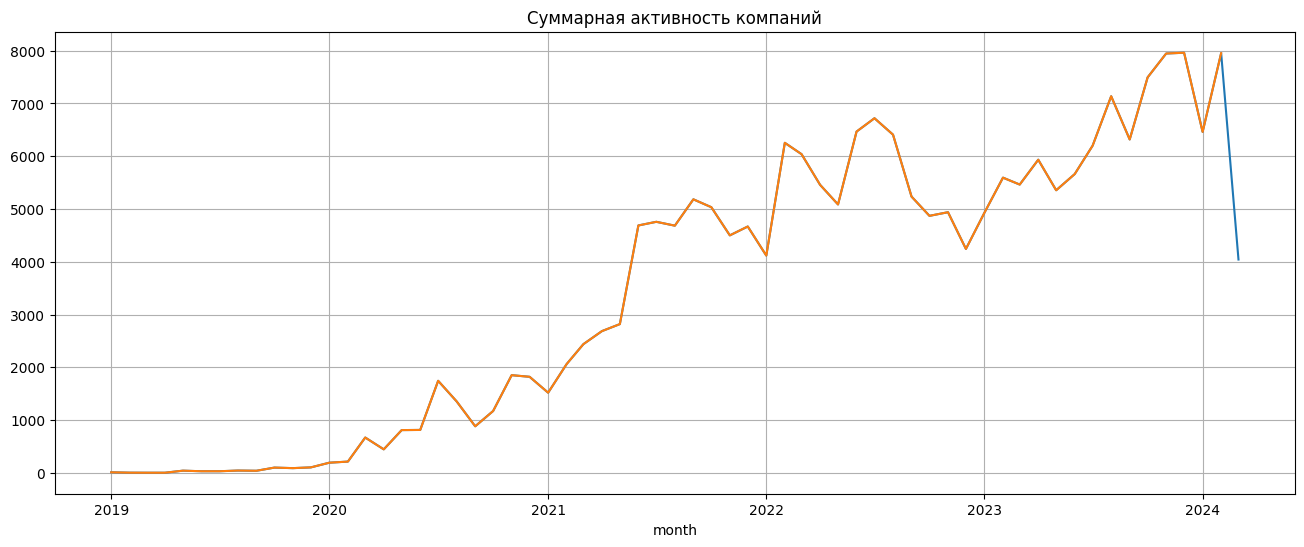

In [ ]:
activities.groupby(['month'])['activities_sum'].sum().\
plot(grid=True, figsize=(16, 6), title='Суммарная активность компаний')

activities_without_march.groupby(['month'])['activities_sum'].sum().\
plot(grid=True, figsize=(16, 6), title='Суммарная активность компаний')

На графике видно, что активность компаний, начиная с 2023 года в целом росла. Синим цветом обозначены данные за март. Т.к. эти данные не являются полными, при оценке активности компаний их лучше в расчет не принимать.  

<Axes: title={'center': 'Количество активных пользователей по месяцам'}, xlabel='month'>

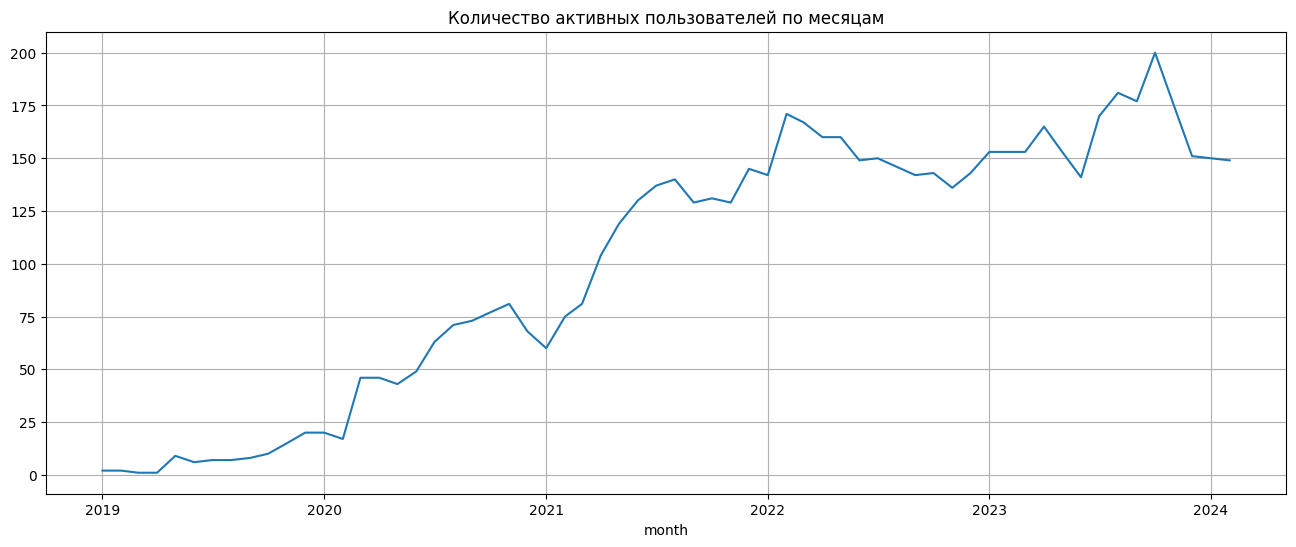

In [ ]:
activities_without_march.groupby(['month'])['company_id'].count().\
plot(grid=True, figsize=(16, 6), title='Количество активных пользователей по месяцам')

В целом количество активных пользователей росло с годами. В июне 2023 было заметное проседание, но начиная с июля количество активных пользователей росло. Пик активности пришелся на октябрь 2023 и далее активность пользователей начала резко падать. Такого заметного падения ранее не наблюдалось.

Посмотрим на распределение активности по месяцам

In [ ]:
activities_without_march['month'] = pd.to_datetime(activities_without_march['month'], format='%Y-%m-%d')

Посчитаем среднюю активность компаний по месяцам. Расчет будем проводить по медиане, чтобы результат не зависел от выбросов

<Axes: title={'center': 'Распеределение активностей по месяцам'}, xlabel='month'>

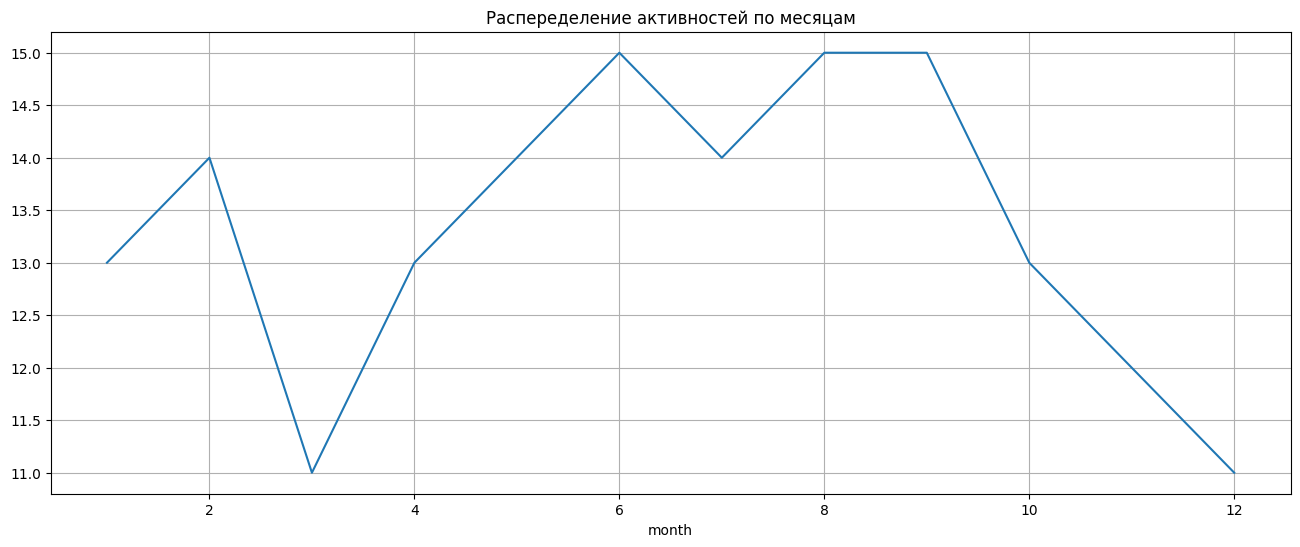

In [ ]:
activities_without_march.groupby(activities_without_march['month'].dt.month)['activities_sum'].median().\
plot(grid=True, figsize=(16, 6), title='Распеределение активностей по месяцам')

В среднем количество активностей по месяцам распределяется следующим образом:    
* самые неактивные месяцы - март, ноябрь, декабрь    
* пик активности приходится на июнь, август и сентябрь    

In [ ]:
activities_sum = (activities[['billing', 'stocks', 'backups', 'projects', 'contractors', 'resource_orders']].sum()).reset_index()
activities_sum.columns = ['activity', 'sum']

In [ ]:
fig = px.bar(activities_sum.sort_values(by='sum', ascending=False),
                   x='activity',
                   y='sum')
fig.update_layout(title='Распределение по видам активности компаний',
                 xaxis_title='Виды активности',
                 yaxis_title='Количество',
                  )
fig.show()

Самая популярная активность - заказ материалов.    
Далее почти в равной степени пользуются популярностью взаимодействия с контрагентами,  складами, и создание проектов.     
Наименее популярная активность - выставление счетов.

Посчитаем суммарную активность за весь период по компаниям и присоединим к основному датасету

In [ ]:
temp = activities.groupby('company_id')['activities_sum'].sum().reset_index()

In [ ]:
billing_essential = billing_essential.merge(temp, on=['company_id'], how = 'left')

### Вывод

**Был проведён анализ датасета activities**

* создана колонка с общей суммой месячной активности компании
* суммарная активность компаний, за последний год в целом росла
* количество активных пользователей в целом росло с годами. Пик активности пришелся на октябрь 2023, но далее далее количество активных пользователей начало резко падать. Такого заметного падения ранее не наблюдалось
* в активности компаний наблюдается сезонность:
 - самые неактивные месяцы - март, ноябрь, декабрь
 - пик активности приходится на июнь, август и сентябрь
* распределение по видам активности следующее:    
cамая популярная активность - заказ материалов.    
Далее почти в равной степени пользуются популярностью взаимодействия с контрагентами, складами, и создание проектов.    
Наименее популярная активность - выставление счетов
* данные о суммарной активности пользователей за весь период добавлены к основному датасету

## companies


### Анализ пропусков

In [ ]:
pd.DataFrame(round(companies.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
working_direction,0.400000
employer_count_interval,0.000000
created_at,0.000000
updated_at,0.000000
billing_tariff_id,1.000000
billing_is_over,0.000000


In [ ]:
len(companies.query('billing_tariff_id.isnull()'))

7

В колонке billing_tarif_id всего 7 пропусков. Проверим, есть ли данные об этих компаниях в датасетах billing и activities

In [ ]:
id_undefined = companies.query('billing_tariff_id.isnull()')['id'].unique()
id_undefined

array([1394, 2366, 7478, 7479, 7480, 7481, 7944])

In [ ]:
billing.query('company_id in @id_undefined')

,company_id,created_at,is_payed,pay_date,payed_until,last_payment,subscription,tarif,tariff_id,price_id,comment,payed_until_max,created_at_min,lifetime


In [ ]:
activities.query('company_id in @id_undefined')

,company_id,month,billing,stocks,backups,projects,contractors,resource_orders,activities_sum


Данных об этих компаниях в других датасетах нет. Удалим их.

In [ ]:
index_names = companies.query('billing_tariff_id.isnull()')['id'].index

In [ ]:
companies.drop(index_names, inplace = True)

В датасете с компаниями содержалось 7 записей о компаниях с неизвестным тарифом, которых не было в датасетах billing и activities. Эти компании мы удалили.

В колонке working_direction по факту гораздо больше пропусков, т.к. в большинстве случаев стоит прочерк. В дальнейшем нам может пригодится информация о профилях компаний, и для выделения процента неопределенных значений, можно оставшиеся пропуски также заполнить прочерками.

In [ ]:
companies['working_direction'] = companies['working_direction'].fillna('-')

Столбец employer_count_interval обозначает категории компаний по численности сотрудников. Для удобства читаемости переведём эти значения в количество сотрудников.

In [ ]:
def company_size(value):
  if value == 1:
    return '1-4'
  elif value == 2:
    return '5-10'
  elif value == 3:
    return '11-20'
  elif value == 4:
    return '21-30'
  elif value == 5:
    return '31-50'
  elif value == 6:
    return '51-100'
  elif value == 7:
    return '101-200'
  elif value == 8:
    return '>201'
  else:
    return 'undefined'

In [ ]:
companies['employer_count_interval'] = companies['employer_count_interval'].apply(company_size)
companies = companies.rename(columns = {'employer_count_interval':'employees_number'})

In [ ]:
companies.sample(5)

,id,working_direction,employees_number,created_at,updated_at,billing_tariff_id,billing_is_over
8836,7870,-,5-10,2023-05-02 06:09:18,2023-05-24 22:00:02,2.00,True
6581,6305,Общестроительные работы,51-100,2022-06-29 16:46:11,2023-07-11 22:00:02,10.00,True
5750,5961,стройтельство,5-10,2022-05-10 14:12:26,2023-07-04 22:00:02,2.00,True
1029,1072,-,1-4,2020-04-30 09:23:44,2022-12-06 03:45:52,2.00,True
6112,6341,-,5-10,2022-07-07 10:21:57,2022-08-11 09:17:54,2.00,False


### График регистрации компаний по месяцам

<Axes: title={'center': 'Регистрация компаний по месяцам'}, xlabel='created_at'>

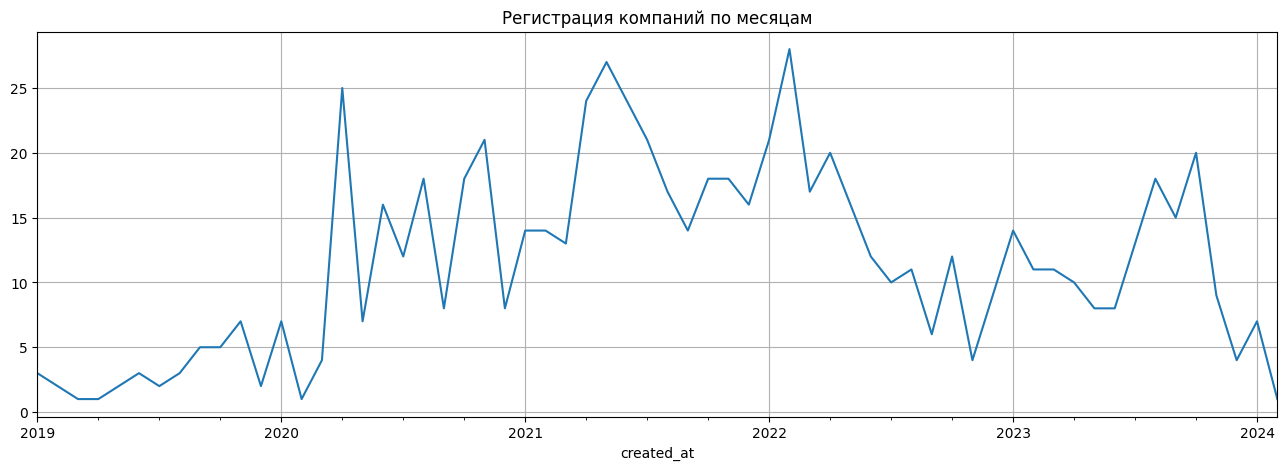

In [ ]:
companies.groupby(companies['created_at'].dt.to_period('M'))['id'].count()\
.plot(grid=True, figsize=(16, 5), title='Регистрация компаний по месяцам')

Пик регистраций приходится на май 2021 года и февраль 2022 года.  Однако, после февраля 2022 года мы наблюдаем резкий спад в регистрации новых компаний. Очевидно, это связано с экономической ситуацией в стране. В 2023 году, особенно во второй его половине половине ситуация несколько улучшается, наблюдается рост числа регистраций, но к концу года опять резко падает. В целом логично предположить, что в конце года компании не склонны начинать пользоваться новыми инструментами для работы. Однако, однозначно можно сказать, что сервис привлекает заметно меньше новых компаний, начиная с 2022 года.

### Категоризация областей деятельности компаний

In [ ]:
companies['working_direction'] = companies['working_direction'].str.lower()

In [ ]:
len(companies['working_direction'].unique())

156

Напишем функцию распределения области деятельности компаний по наиболее часто встречающимся категориям

In [ ]:
def working_direction_categorizer(value):
    if 'строитель' in value:
        return 'строительство'
    elif 'ремонт' in value or 'отдел' in value or 'фасад' in value:
        return 'ремонт и отделка'
    elif 'инженер' in value or 'системы' in value or 'электро' in value or 'сети' in value:
        return 'инженерные системы'
    elif value == '-':
        return 'не определено'
    else:
        return 'вне категорий'

In [ ]:
companies['working_category'] = companies['working_direction'].apply(working_direction_categorizer)

In [ ]:
companies.sample(3)

,id,working_direction,employees_number,created_at,updated_at,billing_tariff_id,billing_is_over,working_category
3115,3323,-,1-4,2021-05-13 07:26:54,2022-12-06 03:46:03,11.00,True,не определено
10293,9148,ремонт/отделка помещений,5-10,2023-10-17 09:54:09,2023-11-24 22:00:01,9.00,True,ремонт и отделка
3108,3231,-,1-4,2021-04-29 14:12:58,2022-12-06 03:45:53,7.00,True,не определено


### Агрегация и объединение данных с основным датасетом

In [ ]:
companies_essential = companies[['id', 'working_category', 'employees_number']]
companies_essential = companies_essential.rename(columns = {'id':'company_id'})

In [ ]:
final_data = billing_essential.merge(companies_essential, on=['company_id'], how = 'left')

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company_id        779 non-null    int64         
 1   created_at        779 non-null    datetime64[ns]
 2   last_payment      779 non-null    datetime64[ns]
 3   subscription      779 non-null    object        
 4   tarif             779 non-null    object        
 5   tariff_id         779 non-null    int64         
 6   price_id          779 non-null    int64         
 7   payed_until_max   779 non-null    datetime64[ns]
 8   lifetime          779 non-null    int64         
 9   activities_sum    716 non-null    float64       
 10  working_category  716 non-null    object        
 11  employees_number  716 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 73.2+ KB


In [ ]:
final_data.sample()

,company_id,created_at,last_payment,subscription,tarif,tariff_id,price_id,payed_until_max,lifetime,activities_sum,working_category,employees_number
206,2767,2021-02-12,2021-02-15,inactive,start,7,23,2022-08-16,18,46.00,строительство,1-4


### Вывод

Проанализирован датасет companies
* изучены пропуски в колонке billing_tariff_id. Найдено 7 компаний с отсутствующей информацией о используемых тарифах. Данные об этих компаниях не найдены в других датасетах, было решено их удалить
* пропуски в колонке working_direction заменены на прочерки
* значения в столбце employer_count_interval заменены с индексов на количество сотрудников
* произведена унификация областей деятельности компаний. 156 уникальных значений были разделены на следующие категории:
 - строительство
 - ремонт и отделка
 - инженерные системы
 - не определено
 - вне категорий
* были проанализированы даты регистрации компаний.
Пик регистраций приходится на май 2021 года и февраль 2022 года. Однако, после февраля 2022 года мы наблюдаем резкий спад в регистрации новых компаний. Очевидно, это связано с экономической ситуацией в стране. В 2023 году, особенно во второй его половине половине ситуация несколько улучшается, наблюдается рост числа регистраций, но к концу года опять резко падает.     
Сервис привлекает заметно меньше новых компаний, начиная с 2022 года
* была произведена агрегация полученных данных и присоединение к основному датасету



### people

Проанализируем пропуски в тадасете

In [ ]:
pd.DataFrame(round(people.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
id,0.000000
company_id,0.000000
user_id,25.200000
role_id,0.000000
created_at,0.000000
updated_at,0.000000
is_deleted,0.000000
deleted_at,57.200000


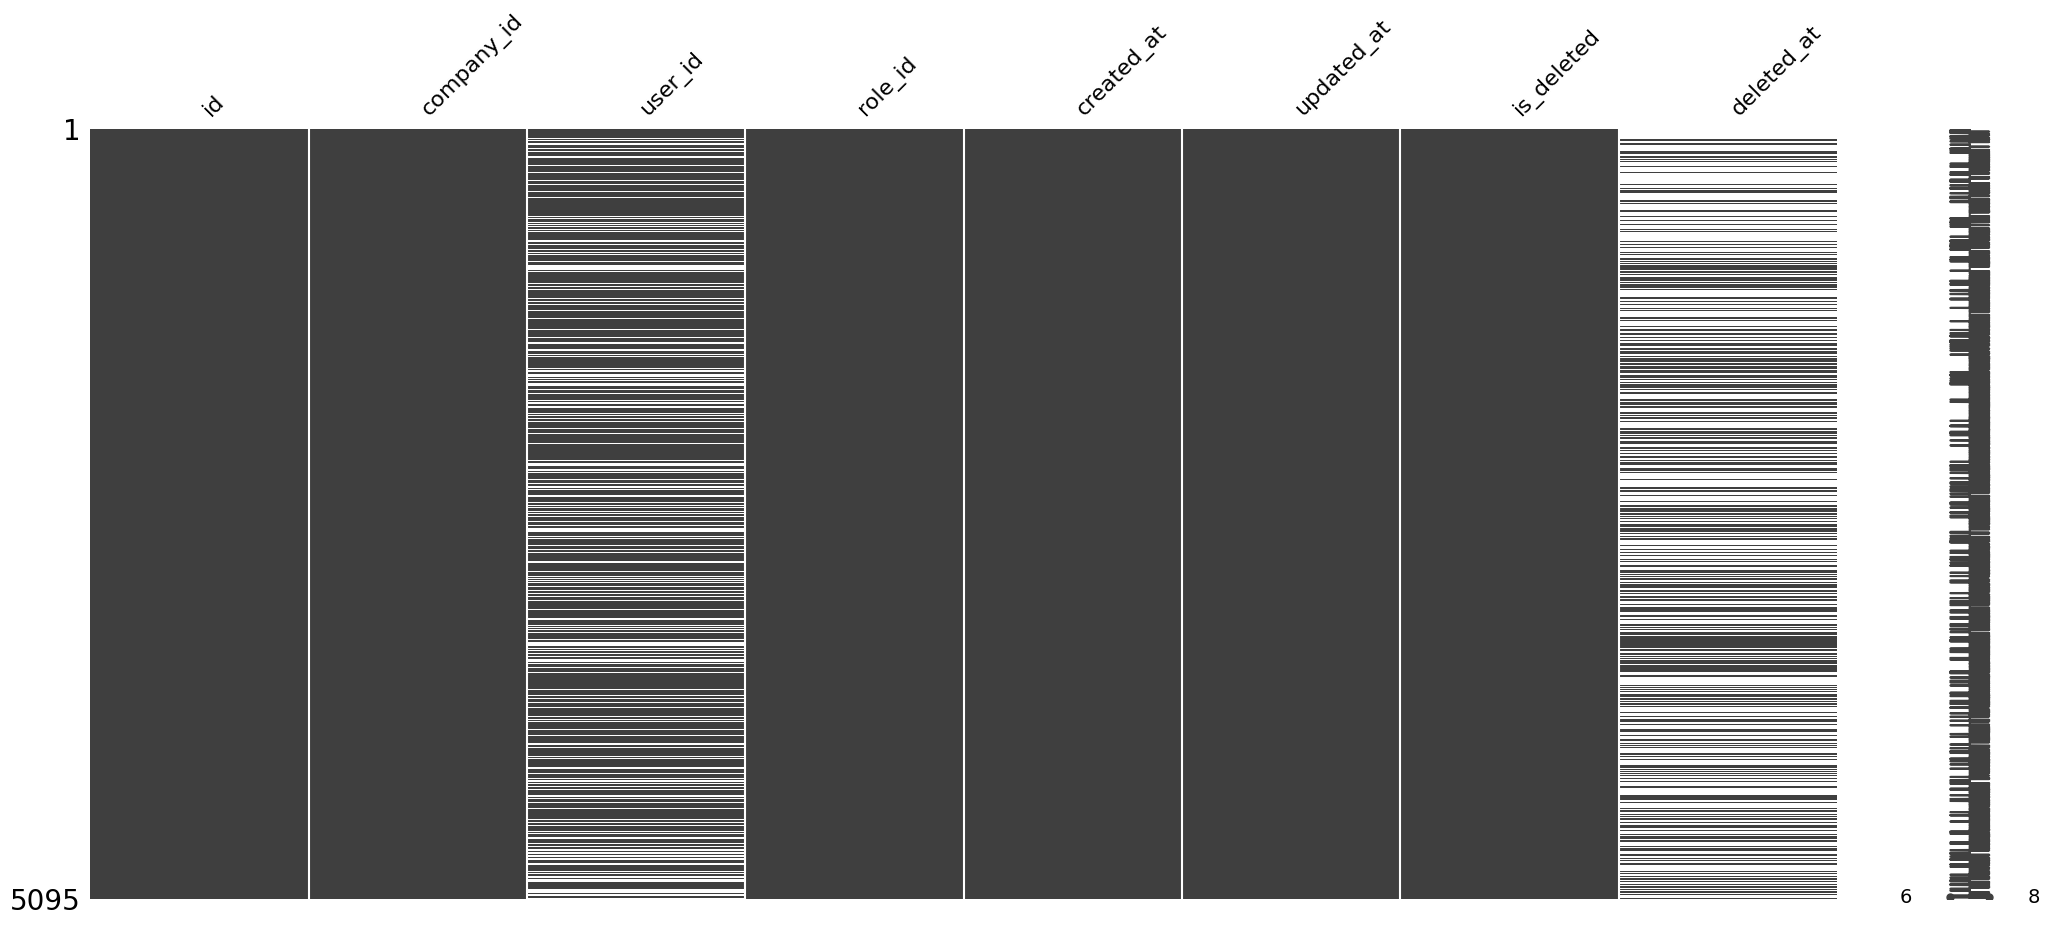

In [ ]:
msno.matrix(people.sort_values(by='created_at', ascending=False));

Не удалось выявить каких-либо закономерностей в появлении пропусков.

In [ ]:
people.sort_values(by='company_id').head()

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
3412,6237,1,NaN,5,2019-01-31 12:20:10,2019-12-11 12:00:15,True,2020-07-14 09:14:46
2440,5331,1,1.00,1,2019-01-23 14:00:51,2019-09-09 13:41:49,False,NaT
3329,6222,1,NaN,5,2019-01-25 21:12:09,2019-01-25 21:12:09,True,2019-01-25 21:13:48
3331,6231,1,NaN,5,2019-01-29 08:59:58,2019-01-29 08:59:58,True,2019-01-29 09:00:09
3332,6233,1,NaN,5,2019-01-29 09:01:27,2019-01-29 09:01:27,True,2019-01-29 09:01:36


Датасет содержит информацию о сотрудниках компаний - клиентов сервиса. Возможно, role_id отражает роли пользователей, которые есть в кабинете Гектаро. Таких ролей 9:    
* Владелец проекта
* Владелец проекта (только просмотр)
* Сметчик
* Сметчик (расширенная)
* Сметчик и Снабженец
* Снабженец
* Прораб
* Финансист
* Кладовщик
Попробуем проверить это предположени


In [ ]:
len(people['role_id'].unique())

1411

In [ ]:
people['role_id'].min()

1

In [ ]:
people['role_id'].max()

135350

In [ ]:
((people.groupby('role_id')['id'].count()).sort_values(ascending=False)).head(5)

role_id
1        1602
65311      28
9614       24
96350      22
75360      21
Name: id, dtype: int64

Наше предположение не подтвердилось. Колонка role_id содержит 1411 уникальных значений.     
Самое маленькое значение - 1, самое большое - 135350.         
При таком большом количестве значений, какие-то из них повторяются. Самый частый role_id - 1.     
Назначение этой колонки определить по имеющимся данным невозможно.

Данный датасет не представляет интереса для решения задач этого исследования.

# Портрет пользователя

## Распределение по количеству сотрудников

In [ ]:
companies_employee = final_data.groupby('employees_number')['company_id'].count().reset_index()
companies_employee = companies_employee.rename(columns = {'company_id':'companies_count'})

In [ ]:
fig = px.bar(companies_employee.sort_values(by='companies_count', ascending=False),
                   x='employees_number',
                   y='companies_count')
fig.update_layout(title='Распределение компаний по численности сотрудников',
                 xaxis_title='Категории численности сотрудников',
                 yaxis_title='Количество компаний',
                  )
fig.update_traces(marker_color='#0558f6')
fig.show()

82% компаний имеют численность до 10 человек.
Заметно преобладает численность 1-4 человека, она составляет 63%






## Распределение по профилям деятельности

Text(0.5, 1.0, 'Распределение компаний по профилям деятельности')

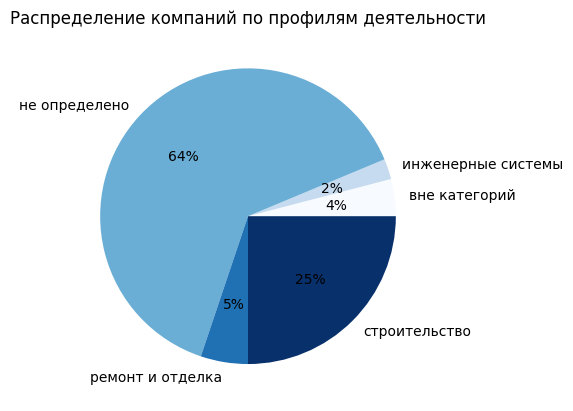

In [ ]:
final_data.groupby(['working_category'])['company_id'].count().plot(kind='pie', y='working_category', ylabel='', autopct='%1.0f%%', colormap='Blues')
plt.title('Распределение компаний по профилям деятельности')

In [ ]:
temp=final_data.query('working_category != "не определено"')

In [ ]:
fig = px.bar((temp['working_category'].value_counts().reset_index()),
                   x='working_category',
                   y='count')
fig.update_layout(title='Распределение компаний по профилям деятельности',
                 xaxis_title='Профиль деятельности',
                 yaxis_title='Количество компаний',
                  )
fig.update_traces(marker_color='#0558f6')
fig.show()

В распределении по профилям едятельности самую большую долю (58%) занимают компании, которые не указали область деятельности. 23% компаний - строительные. 5% приходится на компании, занимающиеся ремонтом.  

## Средний период жизни компании в сервисе

In [ ]:
final_data.lifetime.describe()

count   779.00
mean     14.51
std      10.11
min       0.00
25%       6.00
50%      13.00
75%      20.00
max      62.00
Name: lifetime, dtype: float64

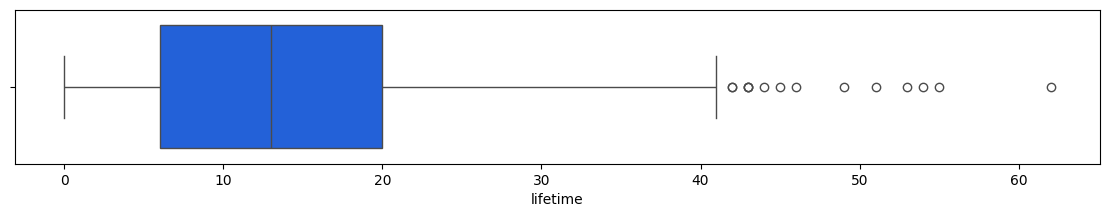

In [ ]:
plt.figure(figsize=(14, 2))
sns.boxplot(final_data.lifetime, orient='h', color='#0558f6');

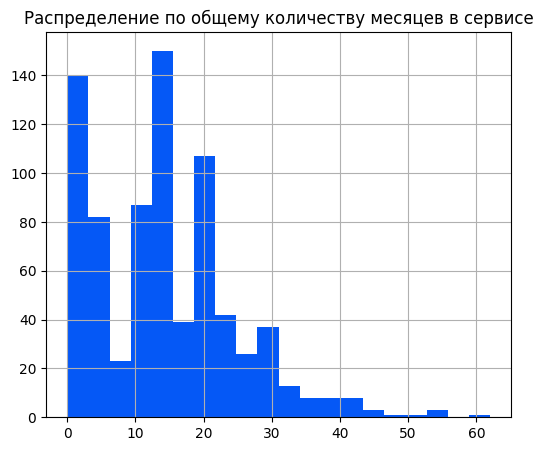

In [ ]:
final_data['lifetime'].hist(figsize=(6, 5), bins=20, color='#0558f6')
plt.title('Распределение по общему количеству месяцев в сервисе')
plt.show()

Средний период жизни компании-пользователя в сервисе - 13 месяцев.    
Количество месяцев в сервисе в среднем варьируется от 6 до 20 (от полугода до почти двух).
Есть отдельные случаи с нулевым лайфтаймом (оплаченные, но замороженные подписки, перенесенные на другой аккаунт и т.п.)
Также, есть компании с лайфтаймом больше 40 месяцев (3 лет).

## Распределение по тарифам

In [ ]:
fig = px.bar((final_data['tarif'].value_counts().reset_index()),
                   x='tarif',
                   y='count')
fig.update_layout(title='Распределение пользователей по тарифам',
                 xaxis_title='Тариф',
                 yaxis_title='Количество пользователей')
fig.update_traces(marker_color='#0558f6')
fig.show()

Преобладают тарифы basic (49%) и start (40%)

<Axes: title={'center': 'Распределение айди тарифов по годам'}, xlabel='created_at'>

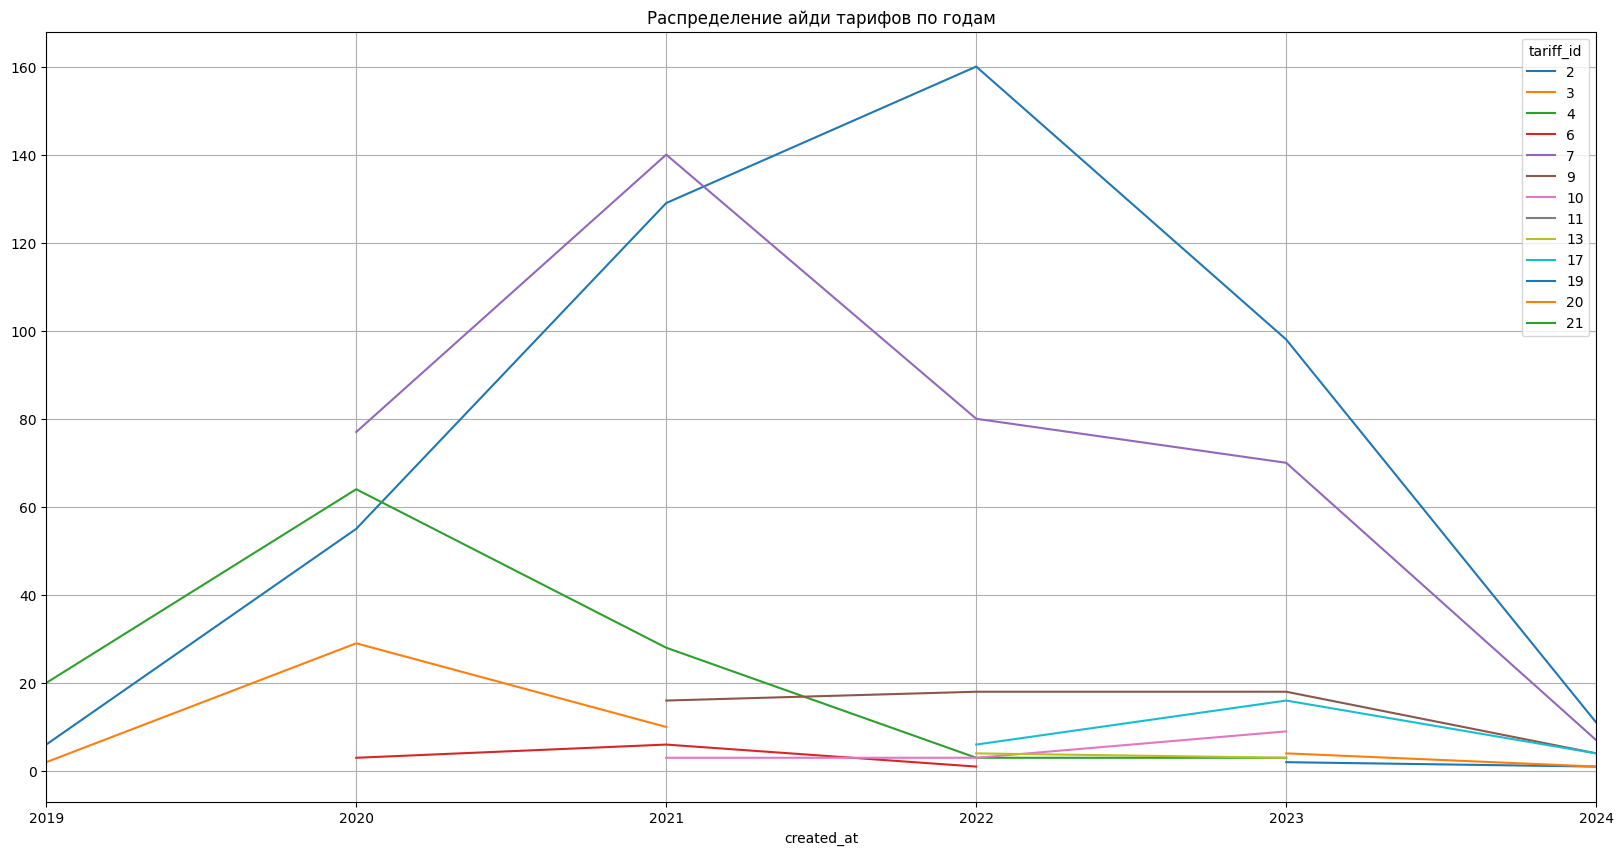

In [ ]:
# Построим график распределения айди тарифов по годам
billing.groupby(
    ['tariff_id', billing['created_at'].dt.to_period('Y')]
)['company_id'].count().unstack('tariff_id').\
plot(grid=True, figsize=(20, 10), title='Распределение айди тарифов по годам')

С течением лет какие-то тарифные индексы появляются, какие-то исчезают. Самые долго существующие и преобладающие по численности пользователей - тарифные индексы 2 (что соответствует тарифу "базовый") и 7 (что соответствует тарифу "старт")

<Axes: title={'center': 'Распределение стоимости тарифов по годам'}, xlabel='created_at'>

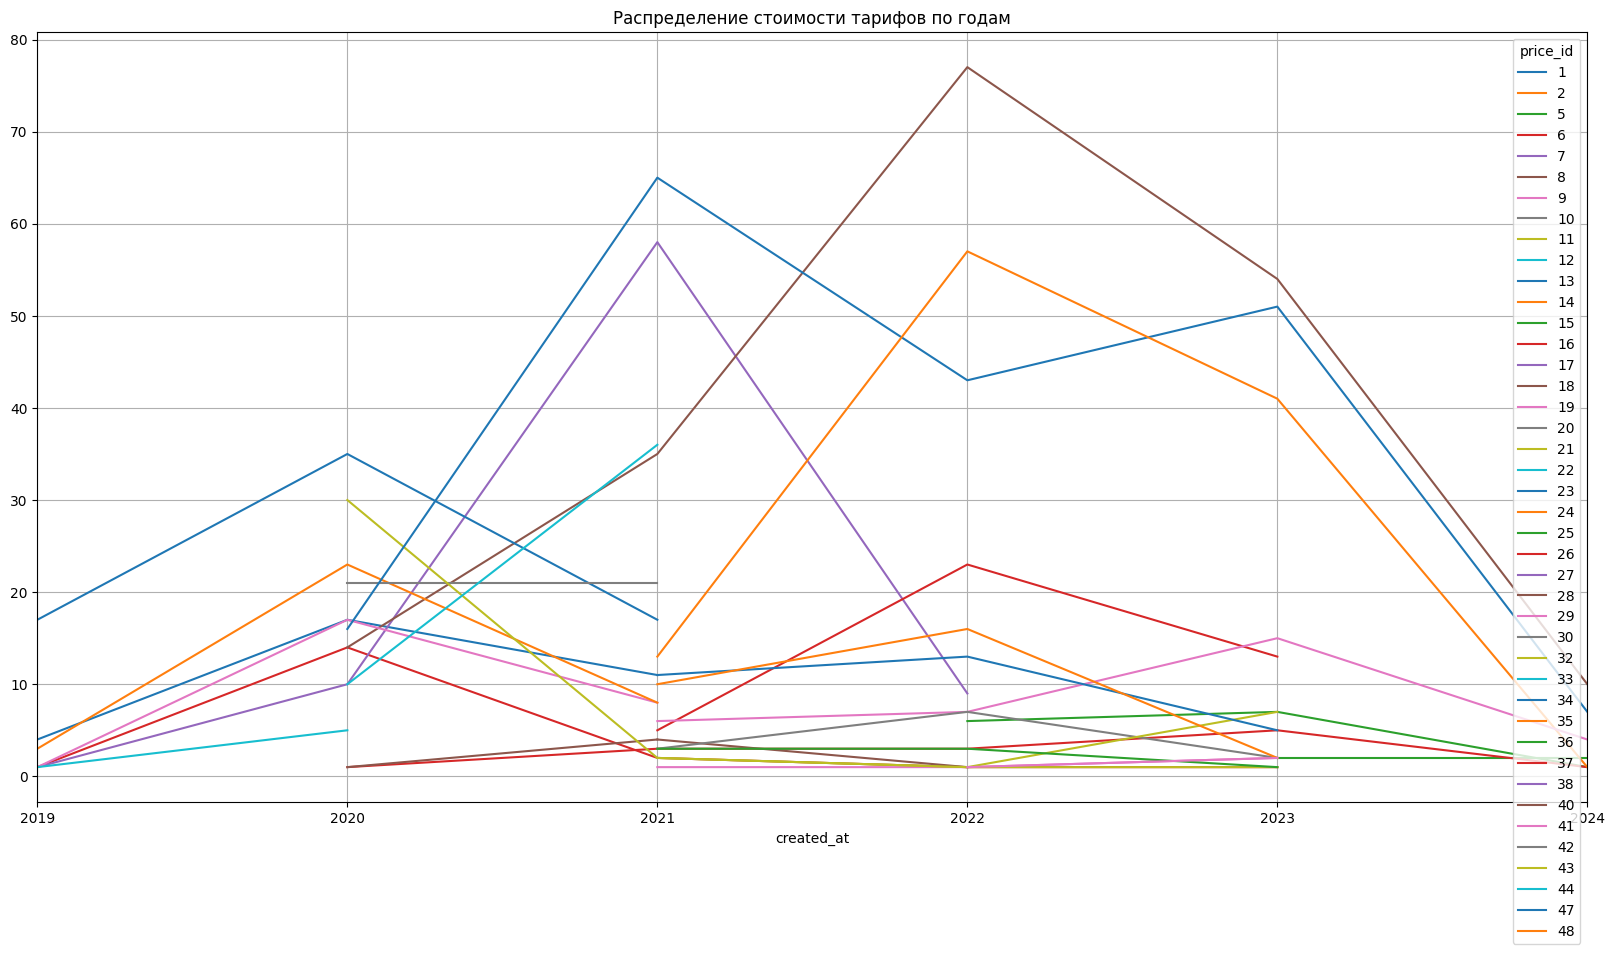

In [ ]:
billing.groupby(
    ['price_id', billing['created_at'].dt.to_period('Y')]
)['company_id'].count().unstack('price_id').\
plot(grid=True, figsize=(20, 10), title='Распределение стоимости тарифов по годам')

На графике распределения индексов стоимости по годам можно проследить, как появлялись и исчезали варианты стоимости подписок. Виден общий спад числа пользователей тарифных предложений, начиная с 2023 года. Однако, из-за обилия индексов сложно проследить жизненный цикл каждого тарифа. Попробуем сделать выборку для интересующего нас периода

In [ ]:
recent = pd.Timestamp(2021, 12, 31)
tarif_cost_recent = billing.query('created_at > @recent')

In [ ]:
# выделим индексы стоимости равные единице в список
temp = tarif_cost_recent.groupby(
    ['price_id', tarif_cost_recent['created_at'].dt.to_period('Y')]
)['company_id'].count().reset_index()
tarifs = (temp.query('company_id == 1'))['price_id'].tolist()

In [ ]:
tarif_cost_recent = tarif_cost_recent.query('price_id not in @tarifs')

<Axes: title={'center': 'Распределение стоимости тарифов по годам'}, xlabel='created_at'>

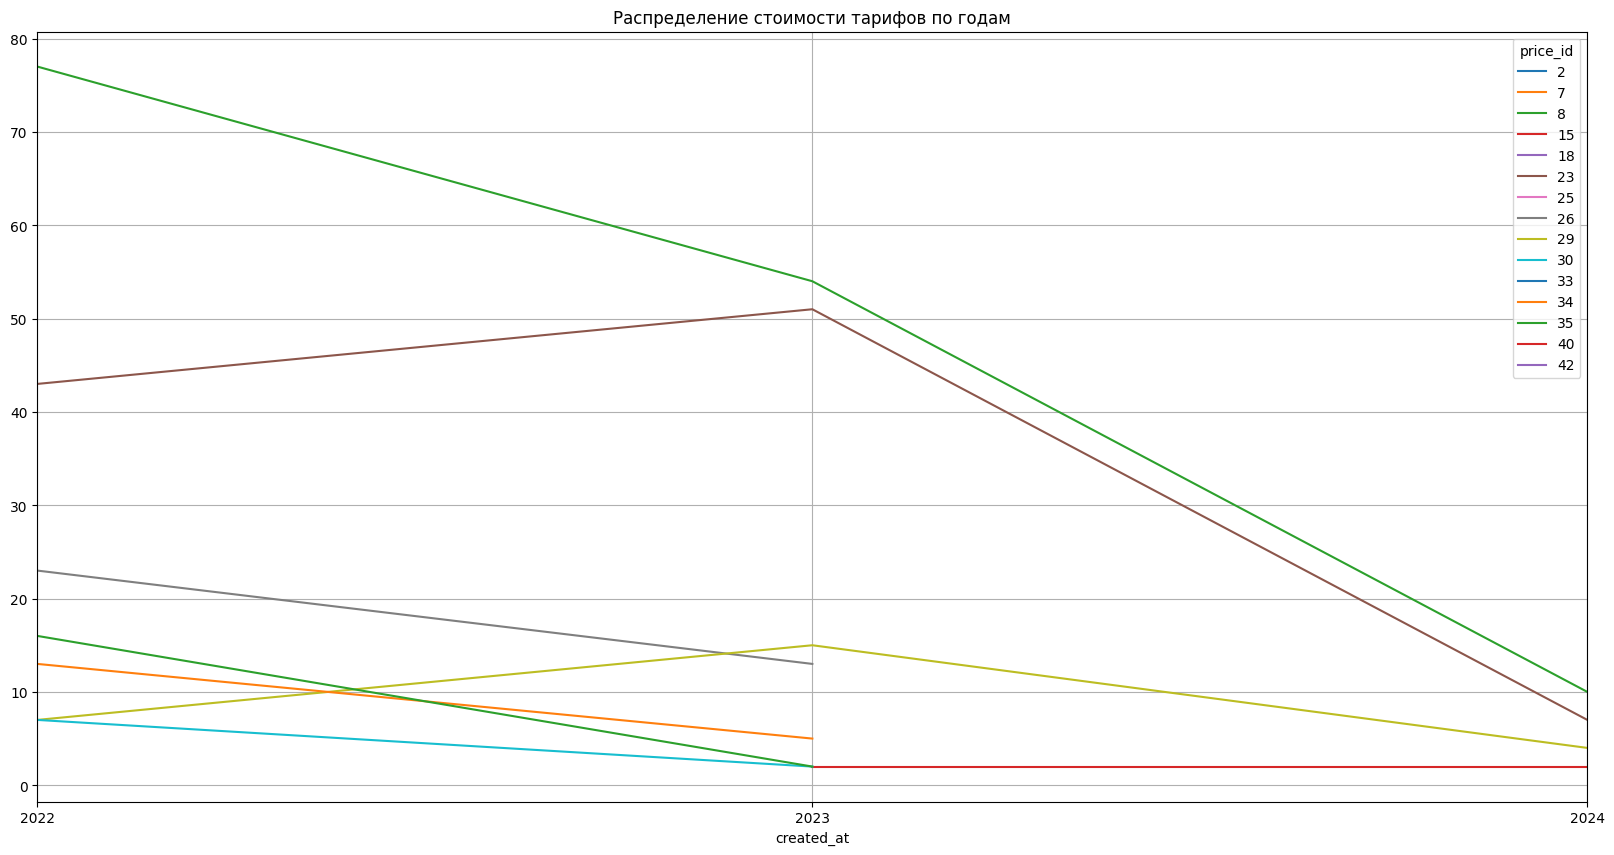

In [ ]:
tarif_cost_recent.groupby(
    ['price_id', tarif_cost_recent['created_at'].dt.to_period('Y')]
)['company_id'].count().unstack('price_id').\
plot(grid=True, figsize=(20, 10), title='Распределение стоимости тарифов по годам')

Теперь когда график не такой шумный, мы можем проследить изменения в индексах стоимости тарифов за последние годы. Начиная с 2023 года заметно сократилось количество тарифных предложений.
Вариантов стоимости тарифов, которые остались в 2023 году и насчитывают более 1 пользователя - 4:
* индекс 15 (соответствует тарифам start basic)
* индекс 29 (соответствует тарифу business)
* индекс 23 (соответствует тарифу start)
* индекс 8 (соответствует тарифу basic)
Всего тарифных предложений в 2023 году - 7
в 2022 году - 14  
Т.е. с 20022 по 2023 год количество вариантов стоимости тарифов сократилось вдвое.  
Количество пользователей всех тарифных предложений к 2024 году резко упало

## Вывод

Мы проанализировали полученные данные и получили портрет компании - типичного пользователя сервиса Gectaro:


* 82% компаний имеют численность до 10 человек. Заметно преобладает численность 1-4 человека, она составляет 63%
* В распределении по профилям едятельности самую большую долю (58%) занимают компании, которые не указали область деятельности. 23% компаний - строительные. 5% приходится на компании, занимающиеся ремонтом.
* Средний период жизни компании-пользователя в сервисе - 13 месяцев.
Количество месяцев в сервисе в среднем варьируется от 6 до 20 (от полугода до почти двух).
* среди тарифов заметно преобладают тарифы basic (49%) и start (40%)
* Самые долго существующие и преобладающие по численности пользователей тарифные планы (billing_tariff_id) - 2 (что соответствует тарифу "базовый") и 7 (что соответствует тарифу "старт")
* Среди вариантов стоимости тарифов в 2023 преобладают два:
 - индекс 23 (соответствует тарифу start)
 - индекс 8 (соответствует тарифу basic)     
 Всего тарифных предложений в 2023 году - 7 в 2022 году - 14    
Т.е. с 20022 по 2023 год количество вариантов стоимости тарифов сократилось вдвое.    
Количество пользователей всех тарифных предложений к 2024 году резко упало.



# Анаиз ушедших компаний

### График распределения активных и неактивных пользователей

Text(0.5, 1.0, 'Распределение компаний по статусу подписки')

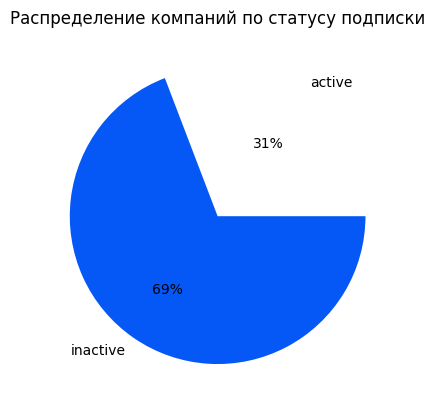

In [ ]:
colors = ['#ffffff', '#0558f6']
final_data.groupby(['subscription'])['company_id'].count().plot(kind='pie', y='subscription', ylabel='', autopct='%1.0f%%', colors=colors)
plt.title('Распределение компаний по статусу подписки')

69% компаний не продлили подписку. Только 31% - это пользователи с кативной подпиской.

Выделим две группы пользователей - действующих и ушедших

In [ ]:
active_users = final_data.query('subscription == "active"')

In [ ]:
inactive_users = final_data.query('subscription == "inactive"')

In [ ]:
inactive_users['payed_until_max'].describe()

count                              539
mean     2022-07-22 22:16:26.100185600
min                2019-11-26 00:00:00
25%                2021-09-23 12:00:00
50%                2022-07-22 00:00:00
75%                2023-07-22 12:00:00
max                2025-02-19 00:00:00
Name: payed_until_max, dtype: object

В данных с ушедшими пользователями присутствуют выбросы. Посмотрим, что это за случаи

In [ ]:
actual_date = pd.Timestamp(2024, 3, 28)

In [ ]:
inactive_users.query('payed_until_max >= @actual_date')

,company_id,created_at,last_payment,subscription,tarif,tariff_id,price_id,payed_until_max,lifetime,activities_sum,working_category,employees_number
595,6712,2022-10-31,2022-12-19,inactive,profy,13,43,2025-02-19,27,293.00,строительство,>201


In [ ]:
billing.query('company_id == 6712')

,company_id,created_at,is_payed,pay_date,payed_until,last_payment,subscription,tarif,tariff_id,price_id,comment,payed_until_max,created_at_min,lifetime
2716,6712,2022-12-19,True,2022-12-19,2023-01-12,2022-12-19,inactive,profy,13,43,"До этого был Профи.\r\nДали доступ к сводному графику\r\n12.01.23 - осталось 567 дней (до 01,08,2024) - временно заморозили, пока не реализуется запрос по доработке снабжения)",2025-02-19,2022-10-31,27
3096,6712,2022-10-31,True,2022-12-01,2025-02-19,2022-12-19,inactive,profy,10,33,"1,12,22 запросили активацию тарифа 18+2\r\n12.01.23 - осталось 567 дней (до 01,08,2024) - временно заморозили, пока не реализуется запрос по доработке снабжения)\r\n31,01,23 Приняли решение разморозить, но количество дней будет идти с того момента, как мы сделаем доработки им, т.е. потом еще раз добавить дни\r\n11,08 отправили им письмо, что последняя их доработка была реализована 19,06,23 и с этого времени их весь тариф будет идти 18+2",2025-02-19,2022-10-31,27


Это оплаченный аккаунт большой компании, который в данный момент заморожен. Удалим его из выборки.

In [ ]:
inactive_users = inactive_users.query('payed_until_max < @actual_date')

### Динамика lifetime по годам

In [ ]:
active_users.lifetime.describe()

count   240.00
mean     22.32
std       9.52
min      12.00
25%      14.00
50%      20.00
75%      28.00
max      62.00
Name: lifetime, dtype: float64

In [ ]:
inactive_users.lifetime.describe()

count   538.00
mean     11.01
std       8.23
min       0.00
25%       3.00
50%      12.00
75%      15.00
max      43.00
Name: lifetime, dtype: float64

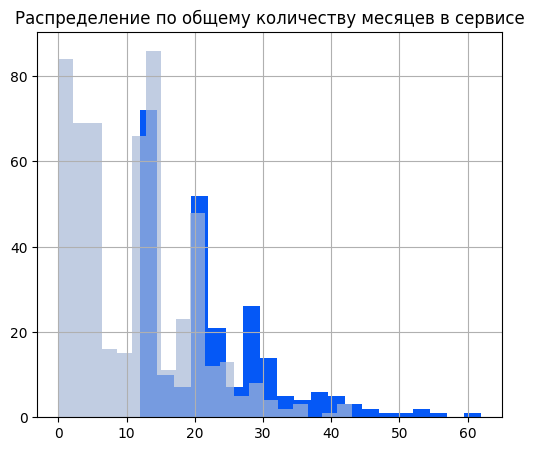

In [ ]:
active_users['lifetime'].hist(figsize=(6, 5), bins=20, color='#0558f6')
plt.title('Распределение по общему количеству месяцев в сервисе')

inactive_users['lifetime'].hist(figsize=(6, 5), bins=20, color='#a7b8d7', alpha=0.7)
plt.title('Распределение по общему количеству месяцев в сервисе')
plt.show()

Средний период пользования сервисом среди ушедших пользователей составляет 12 месяцев и в большинстве случаев не превышет 15 месяцев.
Тогда как среди активных пользователей средний период жизни в сервисе составляет 20 месяцев.

## Зависимость уходов компаний от размера компании

Так как распределение активных и неактивных пользователей очень неравномерное, просто подсчет значений не очень информативен для сранения. Посчитаем для каждой группы процент событий по отношению с общим количеством пользователей.

In [ ]:
companies_by_subscription = final_data.groupby('subscription')['company_id'].count().reset_index()
companies_by_subscription.rename(columns = {'company_id':'count_all'}, inplace = True )
companies_by_subscription

,subscription,count_all
0,active,240
1,inactive,539


In [ ]:
temp = final_data.groupby('employees_number')['subscription'].value_counts().reset_index()
temp  = temp.merge(companies_by_subscription, on='subscription', how='left').reset_index()
temp['percent'] = ((temp['count'] / temp['count_all']) * 100).round(1)

In [ ]:
fig = px.bar(temp.sort_values(by='percent', ascending=False),
                   x='employees_number',
                   y='percent',
                   color='subscription'
             )
fig.update_layout(title='Распределение компаний по численности',
                 xaxis_title='Численность компании',
                 yaxis_title='Количество компаний')
fig.show()

Распределение по численности компаний среди ушедших пользователей и среди активных практически одинаково.  

## Зависимость уходов компаний от профиля деятельности компании

Text(0.5, 1.0, 'Распределение активных компаний по профилю деятельности')

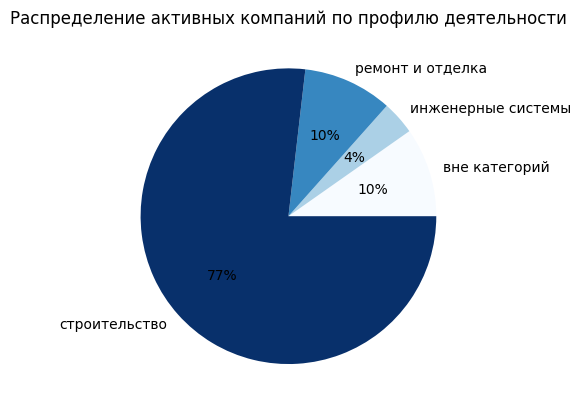

In [ ]:
active_users.query('working_category != "не определено"').groupby(['working_category'])['company_id'].count().plot(kind='pie', y='working_category', ylabel='', autopct='%1.0f%%', colormap='Blues')
plt.title('Распределение активных компаний по профилю деятельности')

Text(0.5, 1.0, 'Распределение ушедших компаний по профилю деятельности')

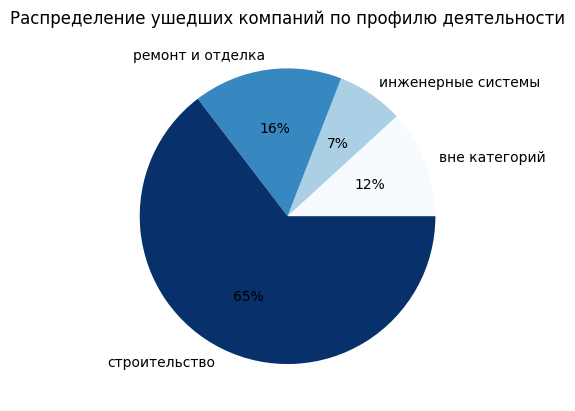

In [ ]:
inactive_users.query('working_category != "не определено"').groupby(['working_category'])['company_id'].count().plot(kind='pie', y='working_category', ylabel='', autopct='%1.0f%%', colormap='Blues')
plt.title('Распределение ушедших компаний по профилю деятельности')

Среди ушедших компаний по сравнению с активными, на 6% больше компаний, занимающихся инженерными системами, а также на 3% больше компаний, занимающихся ремонтом и отделкой.     
Доля строительных компаний среди ушедших на 12% меньше, чем среди активных. Видимо, сервис больше удовлетворяет потребностям непосредственно строительных компаний, нежели компаний смежного профиля.

## С каких тарифов уходят чаще?

In [ ]:
temp = final_data.groupby('tarif')['subscription'].value_counts().reset_index()
temp  = temp.merge(companies_by_subscription, on='subscription', how='left').reset_index()
temp['percent'] = ((temp['count'] / temp['count_all']) * 100).round(1)

In [ ]:
fig = px.bar(temp.sort_values(by='percent', ascending=False),
                   x='tarif',
                   y='percent',
                   color='subscription',
             color_discrete_sequence=["#0558f6", "#a7b8d7"]
             )
fig.update_layout(title='Распределение компаний по тарифам',
                 xaxis_title='Тариф',
                 yaxis_title='Количество компаний')
fig.show()

Чаще всего уходят с тарифов start и basic.
С тарифа business уходят заметно реже.

## C каких тариф айди уходят

<Axes: title={'center': 'График уходов пользователей с различных айди тарифов по годам'}, xlabel='payed_until_max'>

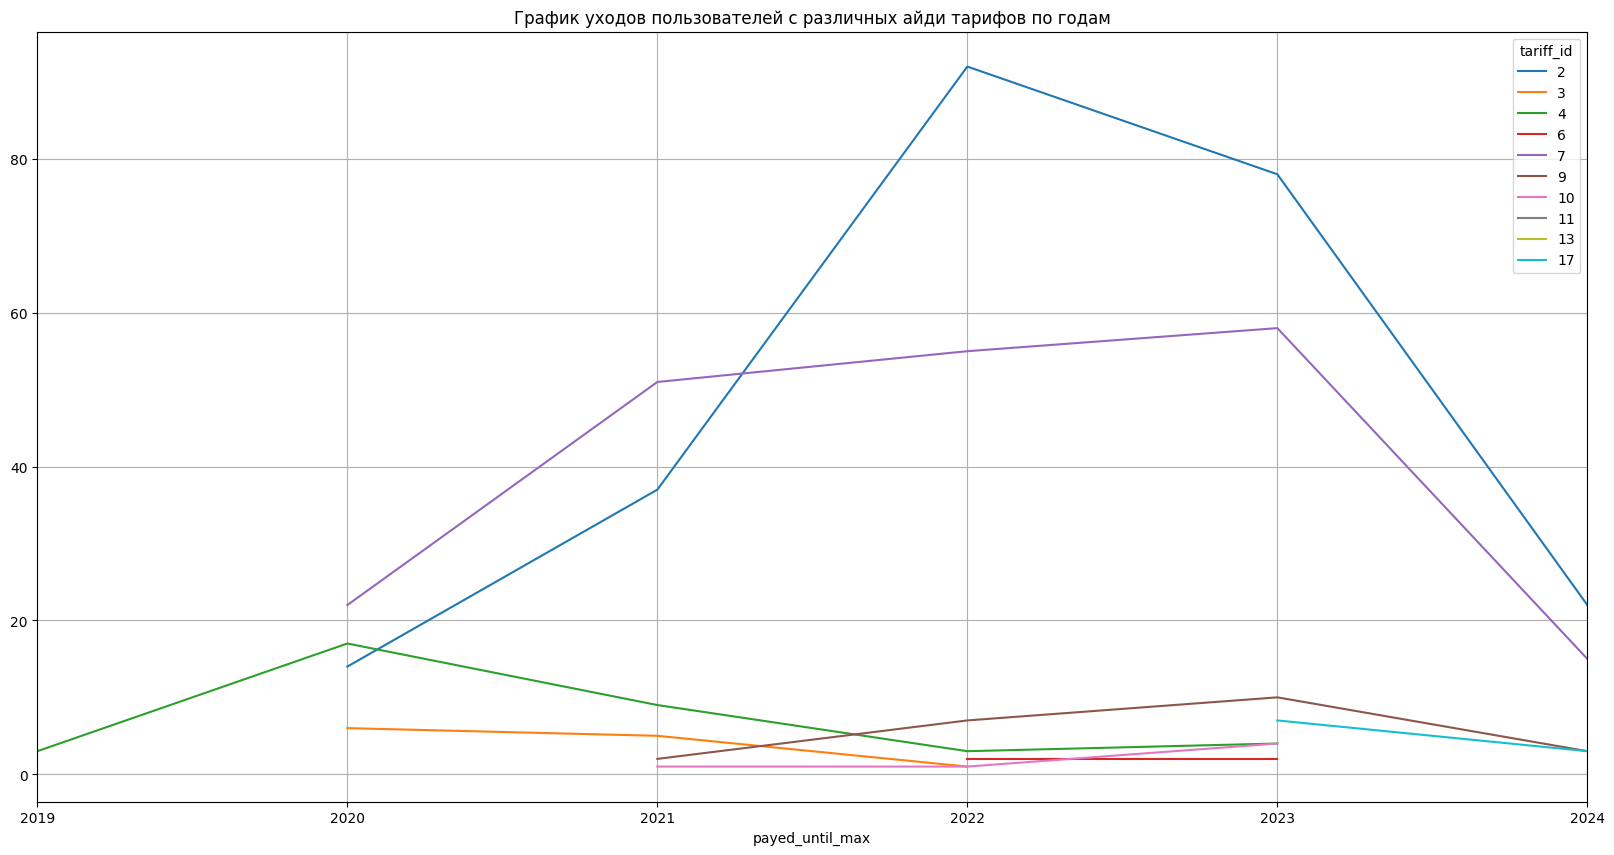

In [ ]:
# Построим график уходов пользователей с различных айди тарифов по годам
inactive_users.groupby(
    ['tariff_id', inactive_users['payed_until_max'].dt.to_period('Y')]
)['company_id'].count().unstack('tariff_id').\
plot(grid=True, figsize=(20, 10), title='График уходов пользователей с различных айди тарифов по годам')

Большинство подписок закончилось в 2022 году, здесь лидирует тариф 2.   
В целом в 2022 году уходили с подписок 9 (бизнес), 6 (архивный), 10 (профи), 4 (старт), 7 (старт), 2 (базовый)     
В 2023 году лидером по количеству уходов опять стали подписки 2 (базовый) и 7 (старт)
Также в 2023 году уходили с тарифа 9 (бизнес) и 13 (профи).   

## С каких стоимостей тарифов уходят чаще?

<Axes: title={'center': 'График уходов пользователей с различных айди стоимости тарифов по годам'}, xlabel='payed_until_max'>

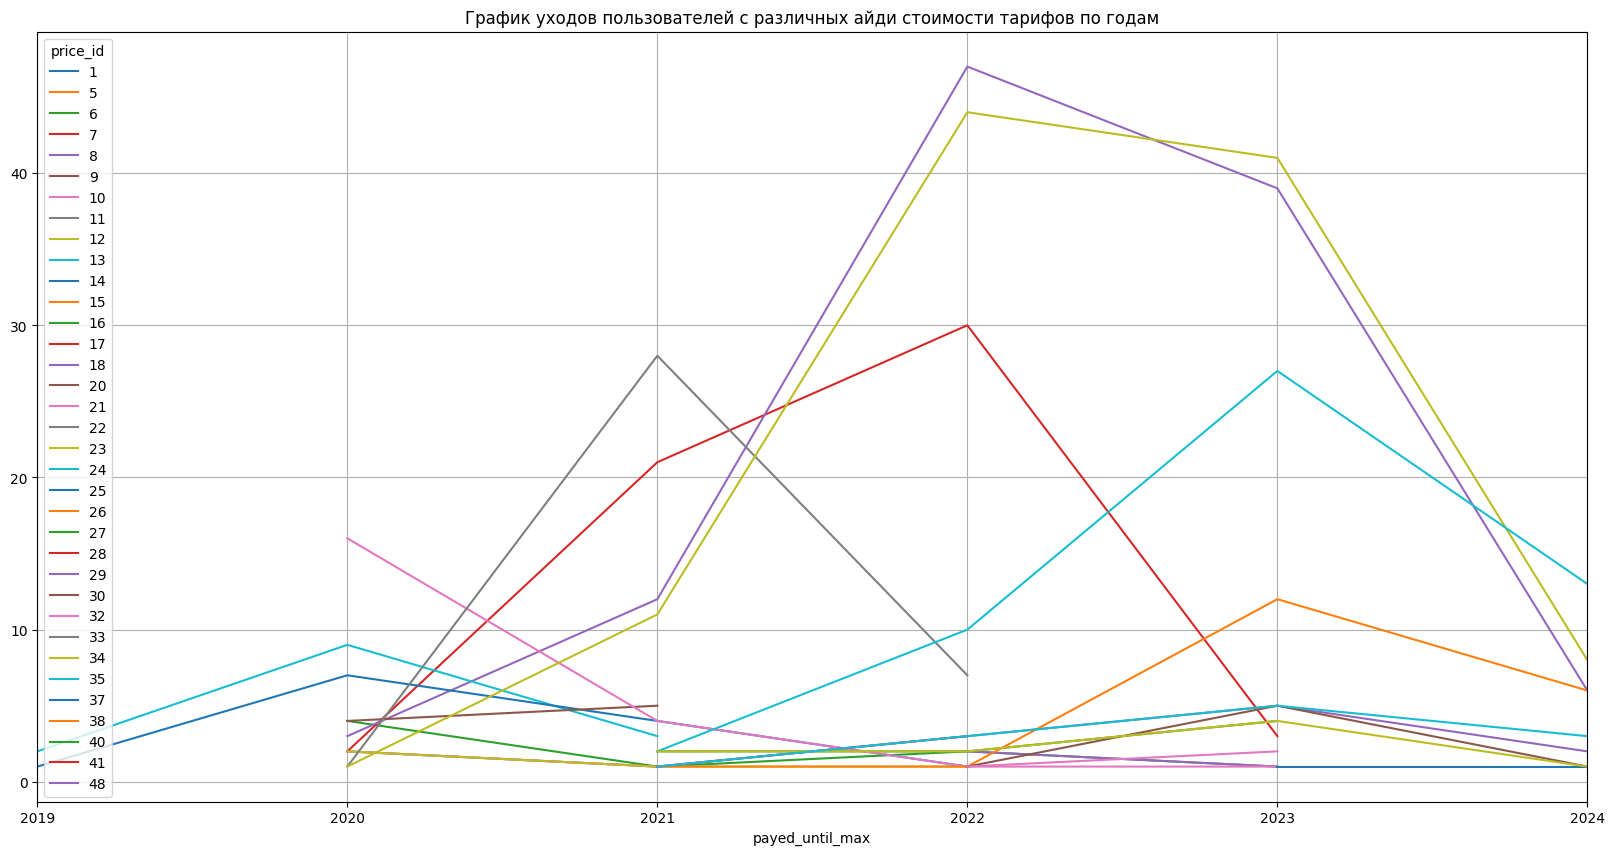

In [ ]:
# Построим график уходов пользователей с различных айди стоимости тарифов по годам
inactive_users.groupby(
    ['price_id', inactive_users['payed_until_max'].dt.to_period('Y')]
)['company_id'].count().unstack('price_id').\
plot(grid=True, figsize=(20, 10), title='График уходов пользователей с различных айди стоимости тарифов по годам')

Исключим из данных тарифные предложения, которые насчитывают только по 1 пользователю и ограничим временные рамки предыдущими двумя годами.  

In [ ]:
recent = pd.Timestamp(2021, 12, 31)
tarif_cost_recent = inactive_users.query('payed_until_max > @recent')

In [ ]:
# выделим индексы стоимости равные единице в список
temp = tarif_cost_recent.groupby(
    ['price_id', tarif_cost_recent['payed_until_max'].dt.to_period('Y')]
)['company_id'].count().reset_index()
tarifs = (temp.query('company_id == 1'))['price_id'].tolist()

In [ ]:
tarif_cost_recent = tarif_cost_recent.query('price_id not in @tarifs')

<Axes: title={'center': 'График уходов пользователей с различных айди стоимости тарифов по годам'}, xlabel='payed_until_max'>

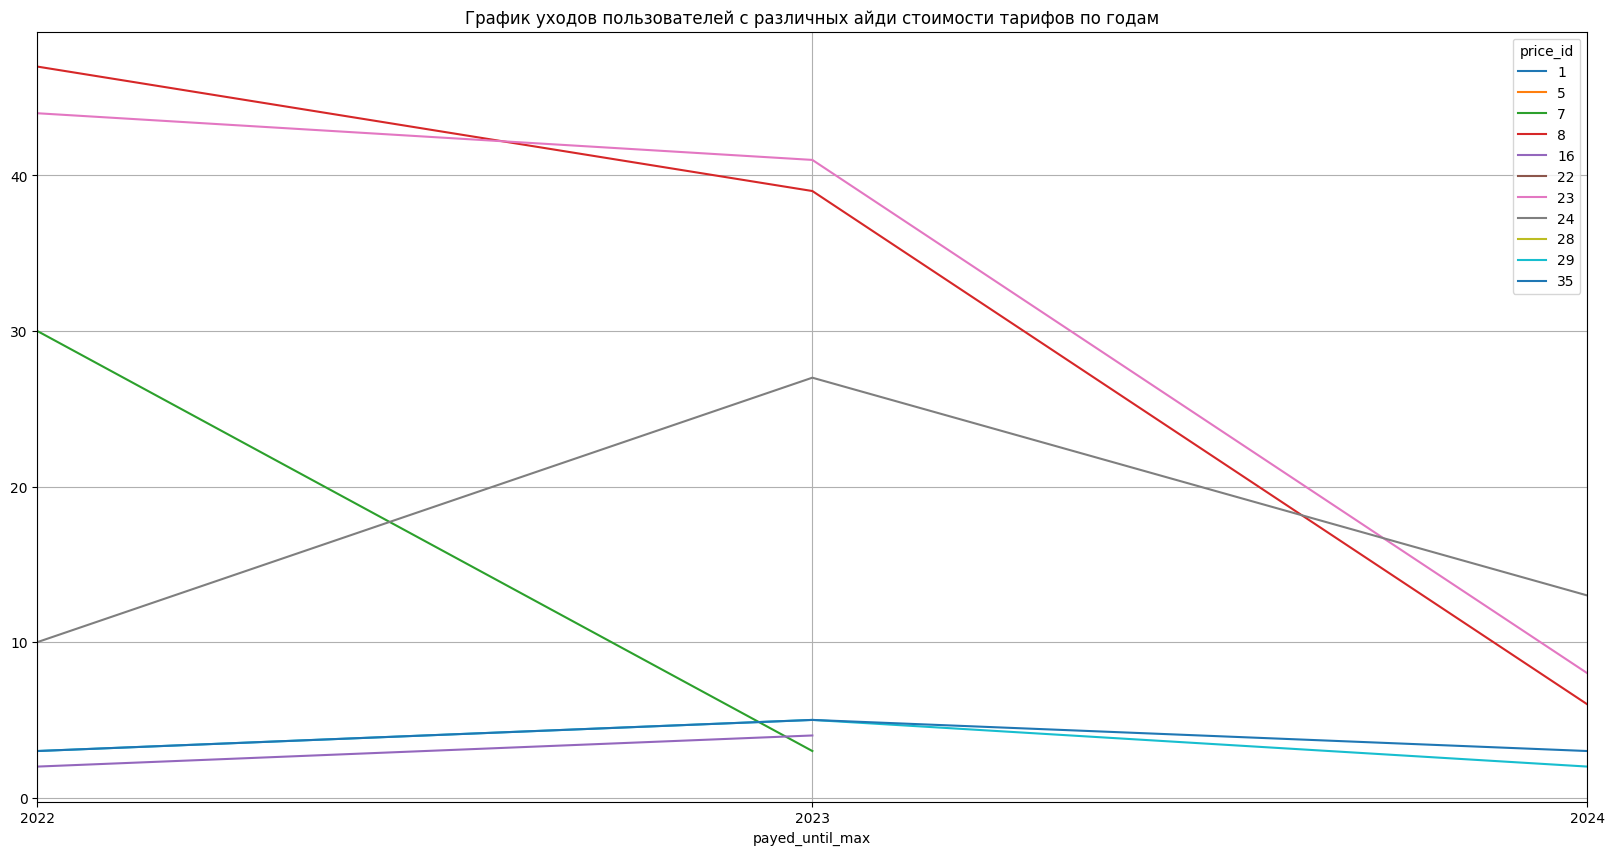

In [ ]:
tarif_cost_recent.groupby(
    ['price_id', tarif_cost_recent['payed_until_max'].dt.to_period('Y')]
)['company_id'].count().unstack('price_id').\
plot(grid=True, figsize=(20, 10), title='График уходов пользователей с различных айди стоимости тарифов по годам')

В 2022-2023 годах чаще всего уходили с тарифных предложений 8 (basic) и 23 (start).
Также в начале 2023 года был пик ухода с тарифного предложения 24 (basic)

## Распеределение по последним платежам

<Axes: title={'center': 'Распеределение по последним платежам'}, xlabel='last_payment'>

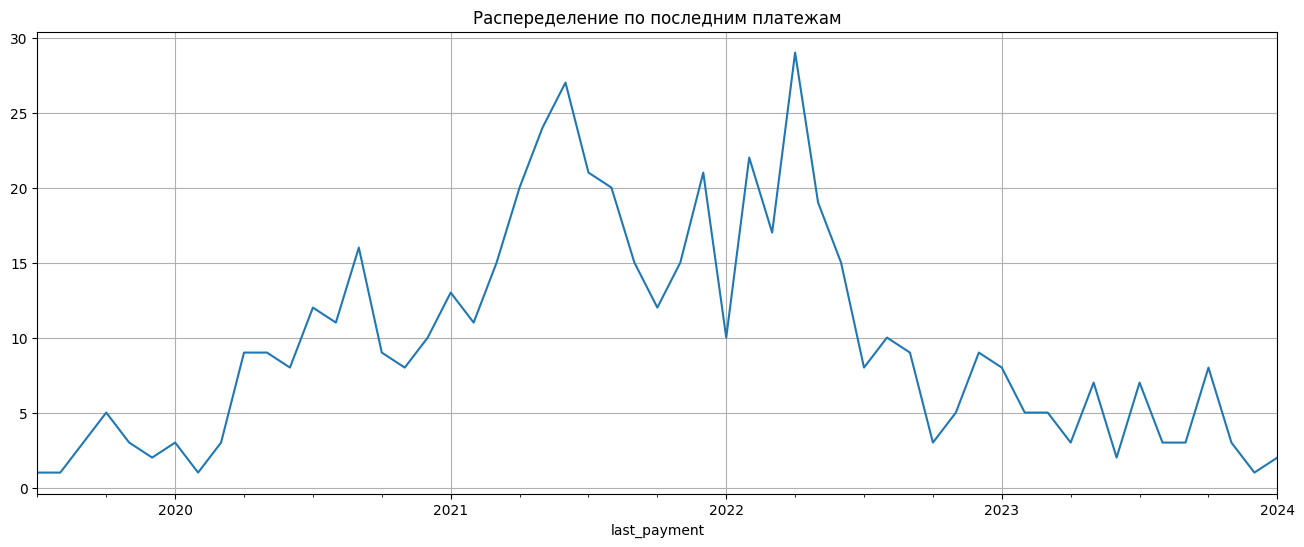

In [ ]:
inactive_users.groupby(inactive_users['last_payment'].dt.to_period('M'))['company_id'].count().\
plot(grid=True, figsize=(16, 6), title='Распеределение по последним платежам')

Среди ушедших пользователей наблюдается два пика в датах последнего платежа - июнь 2021 и апрель 2022

## Распределение по последней дате подписки

<Axes: title={'center': 'Распеределение компаний по дате окончания подписки'}, xlabel='payed_until_max'>

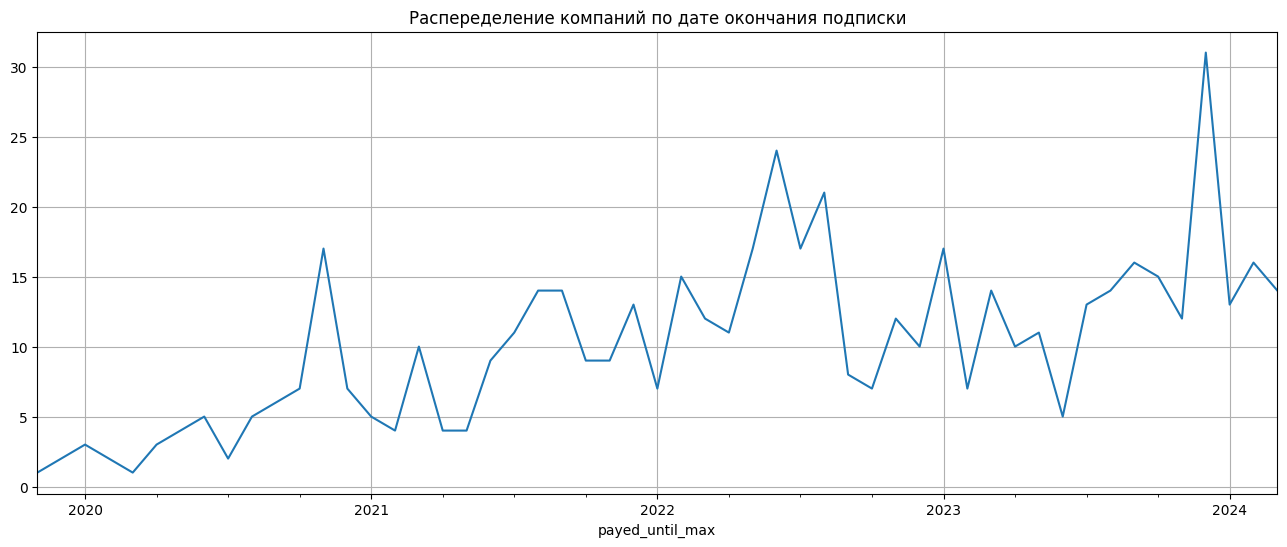

In [ ]:
inactive_users.groupby(inactive_users['payed_until_max'].dt.to_period('M'))['company_id'].count().\
plot(grid=True, figsize=(16, 6), title='Распеределение компаний по дате окончания подписки')

Пик дат окончания и непродления подписок - декабрь 2023. Также есть пики в середине 2022 и в конце 2021.
Учитывая средний цикл жизни компании в сервисе, можно предположить, что это даты окончания годовых подписок, которые так и не были продлены.

## Cвязь между активностями компаний и целевой переменной


In [ ]:
subscription = final_data[['company_id', 'subscription', 'lifetime', 'tarif']]

In [ ]:
activities  = activities.merge(subscription, on='company_id', how='left').reset_index()

In [ ]:
activities['month'] = pd.to_datetime(activities['month'], format='%Y-%m-%d')

In [ ]:
activities_inactive = activities.query('subscription == "inactive"')

<Axes: title={'center': 'График активности пользователей с разделением по статусу подписки'}, xlabel='month'>

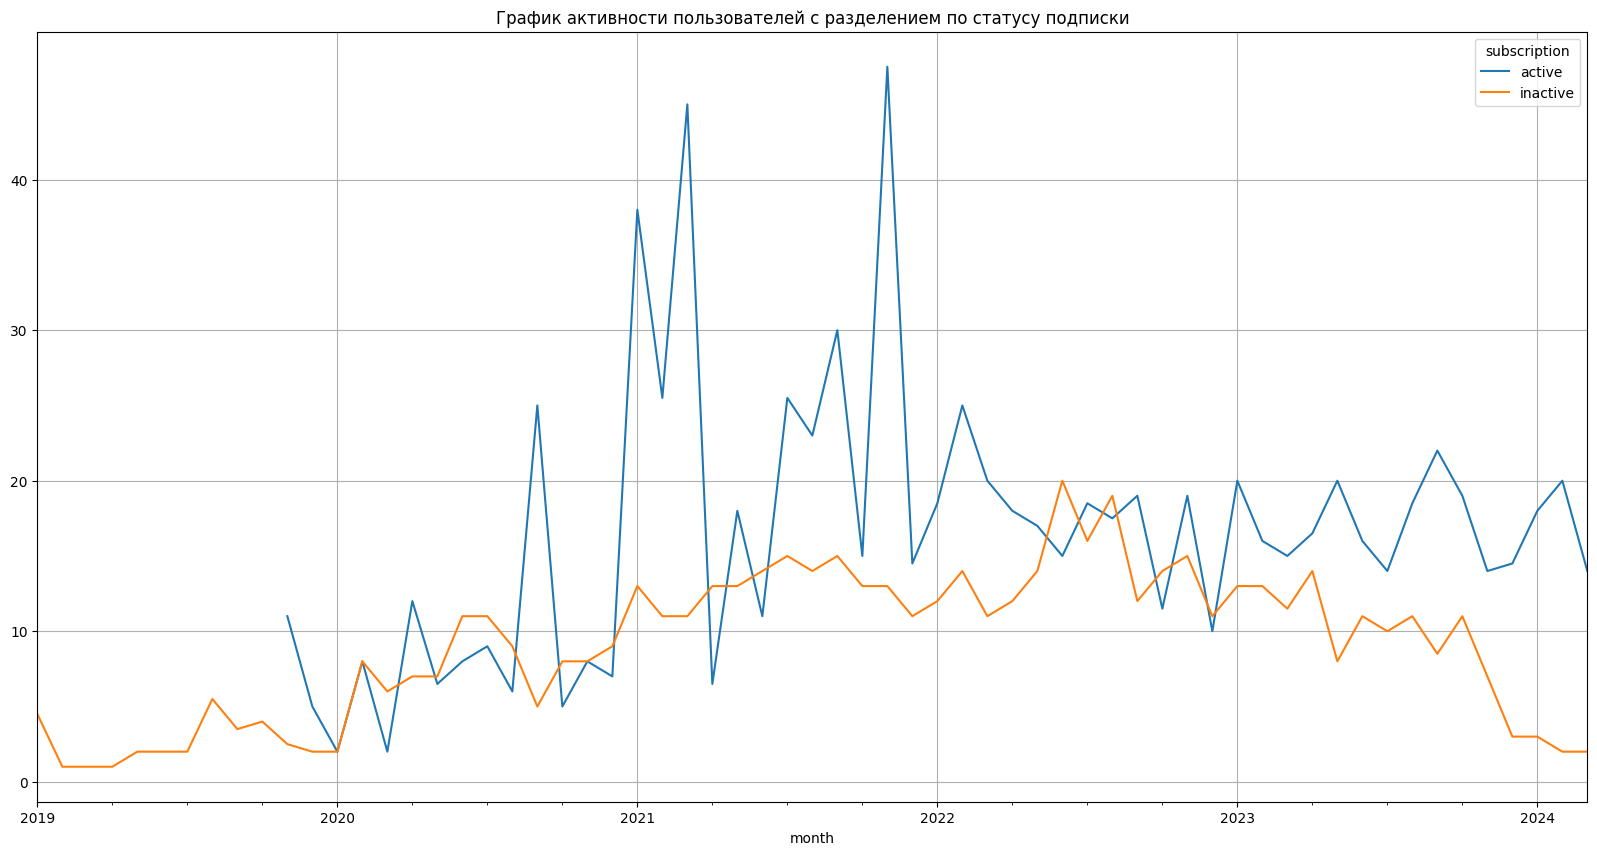

In [ ]:
# График активности пользователей с разделением по статусу подписки
activities.groupby(
    ['subscription', 'month']
)['activities_sum'].median().unstack('subscription').\
plot(grid=True, figsize=(20, 10), title='График активности пользователей с разделением по статусу подписки')

Пик активности ушедших пользователей пришелся на середину 2022 года, после чего активность начала падать и к концу 2023 года практически сошла на нет.   
В активности пользователей с действющей подпиской в период с конца 2020 года до конца 2022 года наблюдаются заметные скачки, медианная активность достигает самых высоких значений, но к 2022 году активность сокращается вполовину. Активность носит скачкообразных характер, с выраженными пиками и падениями.  

## Активность компаний на разных тарифах

<Axes: title={'center': 'Суммарная активность ушедших пользователей с разделением по тарифам'}, xlabel='month'>

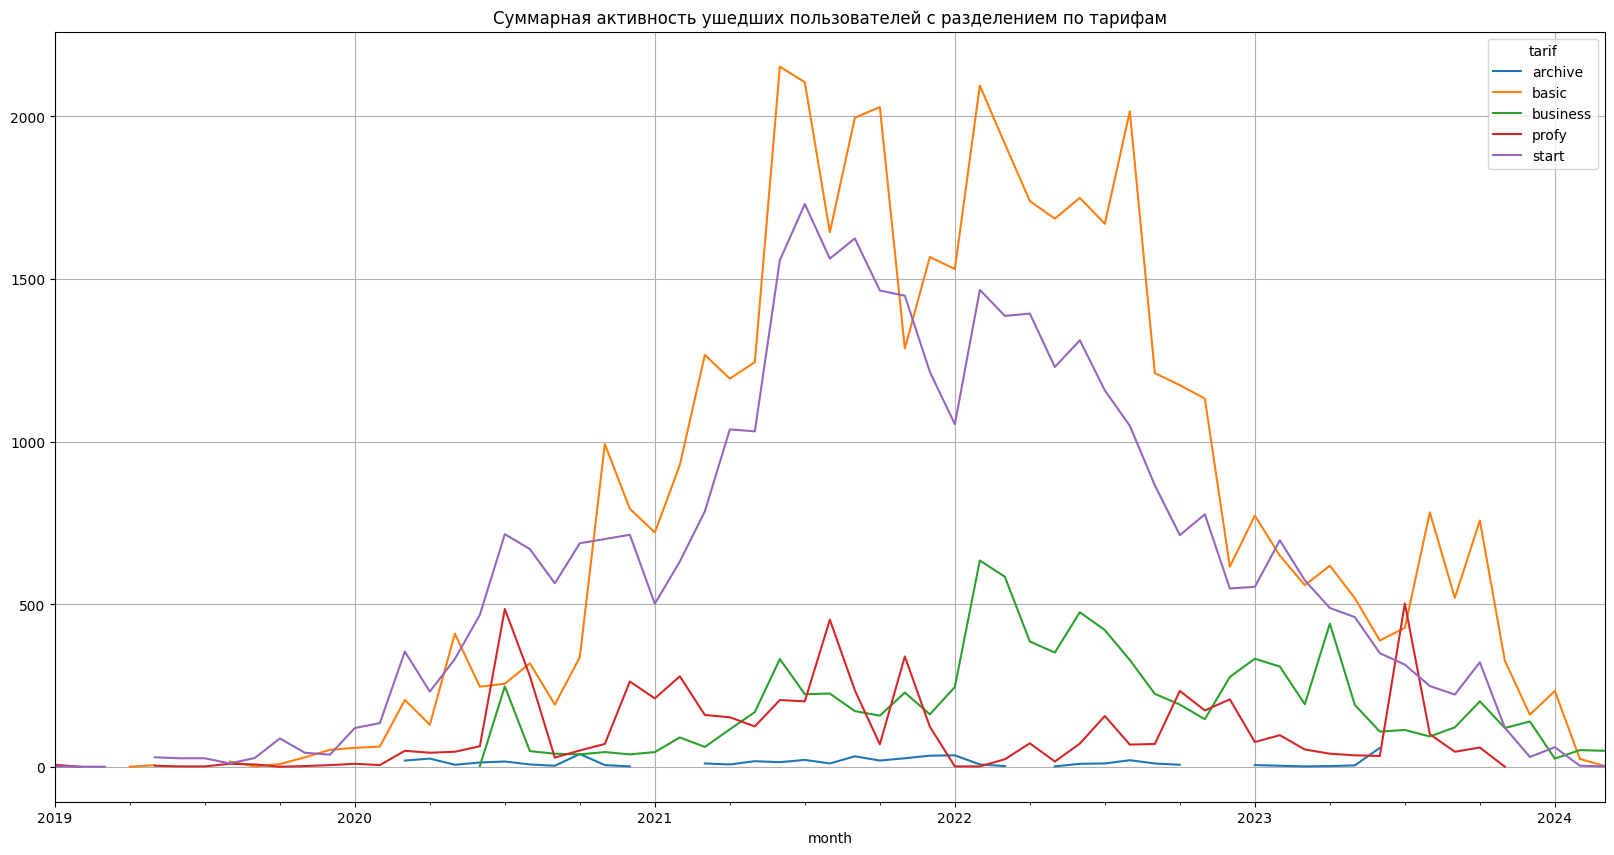

In [ ]:
# График активности ушедших компаний с разделением по тарифам
activities_inactive.groupby(
    ['tarif', 'month']
)['activities_sum'].sum().unstack('tarif').\
plot(grid=True, figsize=(20, 10), title='Суммарная активность ушедших пользователей с разделением по тарифам')

<Axes: title={'center': 'Медианная активность ушедших пользователей с разделением по тарифам'}, xlabel='month'>

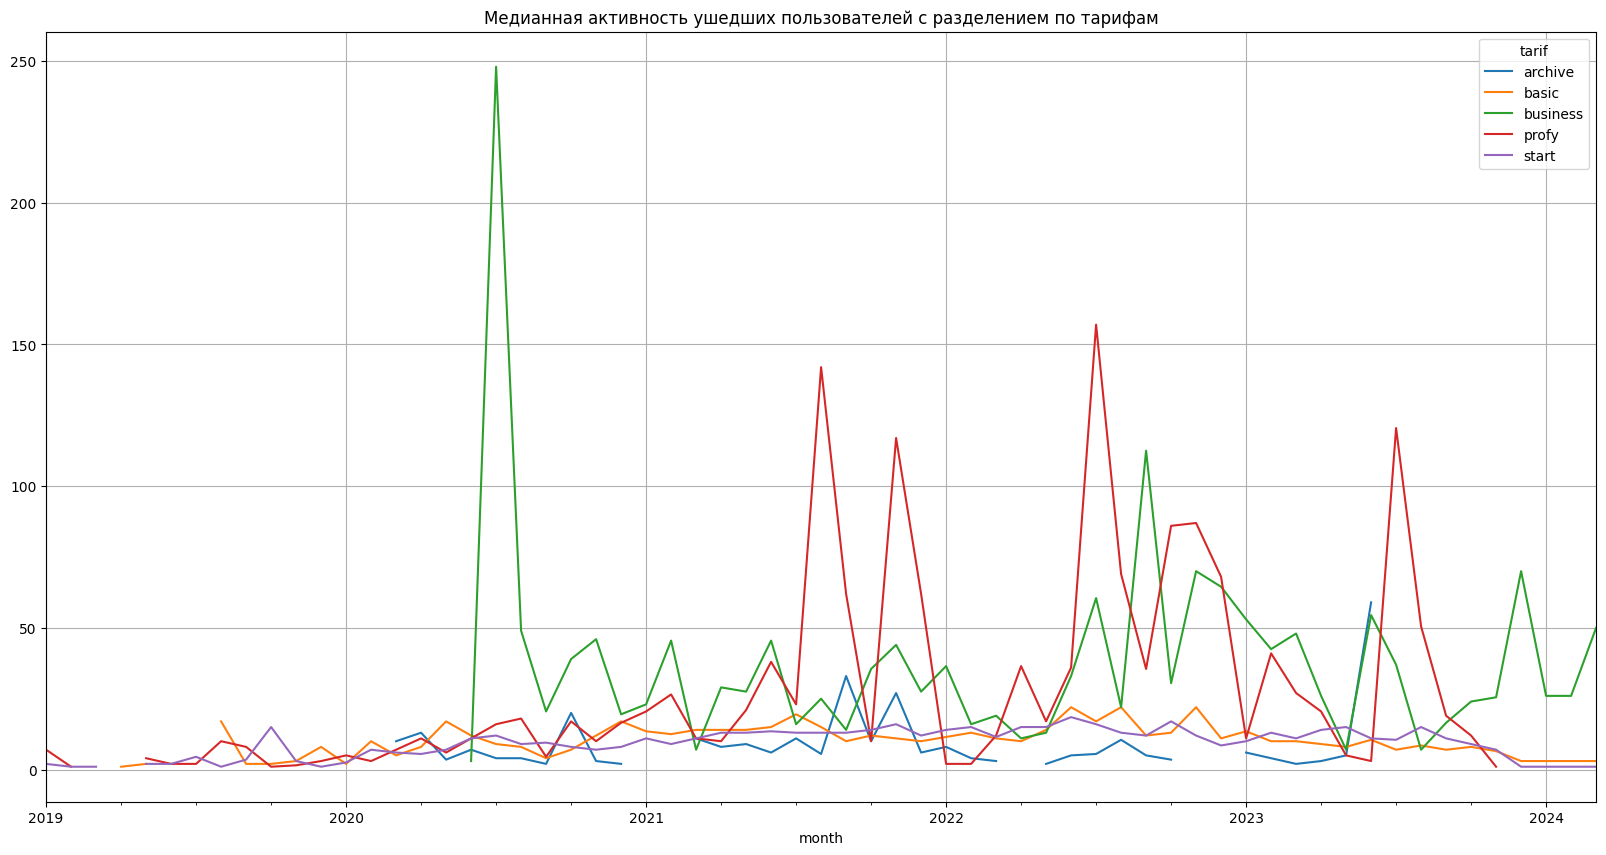

In [ ]:
# График активности ушедших компаний с разделением по тарифам
activities_inactive.groupby(
    ['tarif', 'month']
)['activities_sum'].median().unstack('tarif').\
plot(grid=True, figsize=(20, 10), title='Медианная активность ушедших пользователей с разделением по тарифам')

Активность компаний практически на всех тарифах носит скачкообразный характер. Видимо, это связано с проектным характером деятельности строительных компаний. Медианная активность выше всего у тарифа business и тарифа profy. У больших компаний - большое количество проектов. Всплески активности по всем тарифам в-основном приходятся на середину и вторую половину года, но при этом к концу года, как правило, наблюдается заметный спад.

In [ ]:
temp = billing.query('subscription == "inactive" & comment.notnull()')

In [ ]:
for value in temp['comment']:
  if 'возврат' in value or 'замороз' in value or 'доработка' in value or 'не устроил' in value:
    print(value)

оплата пришла 9,06,20
15.07.20 - cделали возврат, доступ заблокировала
оплата поступила 18,08
23,09,21 - возврат подписки, переходят на 1С
20.05 - возврат, останавливаем платный тариф
Был оплачен и включен тариф Стартовый на 3 мес.
18,05 - закрыла доступ, клиенту нужен функционал по НДС, утвердили, что мы отключаем оплаченный тариф, и включим полностью, как добавится функционал
17,07 - включили заново 3 мес стартового тарифа по их просьбе
25,09 - отключили тариф, потребовали возврата
06,05,20 оплатил 2мя платежами. Сначала 8900 за 1 мес, затем захотел бесплатное внедрение и доплатил еще 2 мес  16300
05,06,20 - согласовали с Грантом сдвинуть срок оплаты на неделю, чтобы не потерять как клиентов
29,06,20 - попросил возврат (отредактировала срок окончания с 14,08 на 29,06)
26,05 - заблокировали доступ, клиент запросил возврат
26,05 - оплатили, но Василий сообщил, что будет другой владелец регистрироваться на платформе, доступ по 02,06,21 заморозили
01,10,20 - сделали возврат, закрыли тари

Изучив комментарии датасета billing ушедших компаний, было выявлено несколько посторяющихся причин ухода:
- недовольство функционалом
- ожидание исполнения пожеланий к доработке сервиса
- отсутствие заказов, уход из России


## Вывод

Проанализировав данные об ушедших компаниях мы выявили следующее:

* 69% компаний не продлили подписку. Только 31% - это пользователи с активной подпиской.
* Средний период пользования сервисом среди ушедших пользователей составляет 12 месяцев и в большинстве случаев не превышет 15 месяцев. Тогда как среди активных пользователей средний период жизни в сервисе составляет 20 месяцев.
* Распределение по численности компаний среди ушедших пользователей и среди активных практически одинаково.
* Среди ушедших компаний по сравнению с активными, больше компаний, занимающихся инженерными системами, а также ремонтом и отделкой.
Доля строительных компаний среди ушедших меньше, чем среди активных. Видимо, сервис больше удовлетворяет потребностям непосредственно строительных компаний, нежели компаний смежного профиля.
* Чаще всего уходят с тарифов start и basic. С тарифа business уходят заметно реже.
* Большинство подписок закончилось в 2022 году, здесь лидирует тариф 2.
В целом в 2022 году уходили с подписок 9 (бизнес), 6 (архивный), 10 (профи), 4 (старт), 7 (старт), 2 (базовый)
В 2023 году лидером по количеству уходов опять стали подписки 2 (базовый) и 7 (старт) Также в 2023 году уходили с тарифа 9 (бизнес) и 13 (профи).
* В 2022-2023 годах чаще всего уходили с тарифных предложений 8 (basic) и 23 (start). Также в начале 2023 года был пик ухода с тарифного предложения 24 (basic)
* Среди ушедших пользователей наблюдается два пика в датах последнего платежа - июнь 2021 и апрель 2022
* Пик дат окончания и непродления подписок - декабрь 2023. Также есть пики в середине 2022 и в конце 2021. Учитывая средний цикл жизни компании в сервисе, можно предположить, что это даты окончания годовых подписок, которые так и не были продлены.
* Пик активности ушедших пользователей пришелся на середину 2021, начало 2022 года. После февраля 2022 года активность резко падает и к концу 2023 сходит на нет.
Активность пользователей с действющей подпиской начала расти с 2021 года и сейчас находится на пике.
* Активность ушедших компаний практически на всех тарифах носит скачкообразный характер. Видимо, это связано с проектным характером деятельности строительных компаний. Медианная активность выше всего у тарифа business и тарифа profy. У больших компаний - большое количество проектов. Всплески активности по всем тарифам в-основном приходятся на середину и вторую половину года, но при этом к концу года, как правило, наблюдается заметный спад.

# Общий вывод

Были загружены и обработаны следующие датасеты:

**activities**
- датасет содержит 6316 записей о месячных активностях 716 компаний, пользователей сервиса Гектаро
- колонки, содержащие даты приведены в соответствующий формат
- данные о счетах, количестве складов, бэкапов, проектов, контрагентов и заказах материалов переведены в целочисленный формат
- пропусков нет
- явных дубликатов не обнаружено

**billing**     
- датасет содержит 3480 записей о платежах 1841 компании, пользователей сервиса Гектаро
-  этом индекс указывает как минимум на 18953 изначальных записей.     
Это говорит о том, что часть данных либо была удалена, либо эта выгрузка является выборкой из какого-то более полного датафрейма. Т.к. дальнейшего исследования эти индексы не являются существенными, их решено было сбросить.     
- столбец id, по всей видимости, отражает некоторую выборку компаний, отсортированных по дате создания. Возможно, из выборки были сключены компании с тестовыми тарифами.     
Т.к. для дальнейшего анализа эта колонка не представляет интереса, было решено её удалить.       
- удалена колонка unnamed_0, содержащая старые индексы
- явных дубликатов не обнаружено     
- имеются пропуски в колонках comment и pay_date             
- колонки, содержащие даты приведены в соответствующий формат         

**companies**      
- датасет содержит 723 записи о компаниях, пользователях сервиса Гектаро.
- при этом индексы 19-17972, т.е. часть данных либо удалена, либо это подвыборка более полного датасета. Возможно, это как раз бесплатные тестовые тарифы. Если это так, то эти записи составляют более 96%.    
- колонки, содержащие даты приведены в соответствующий формат    
- явных дубликатов не обнаружено   
- имеются пропуски в колонках working_direction и billing_tariff_id.

**people**     
- датасет содержит 5095 записей о сотрудниках 712 компаний, пользователей сервиса Гектаро.     
- при этом индексы 2-17054, т.е. часть данных либо удалена, либо это подвыборка более полного датасета.
- колонки, содержащие даты приведены в соответствующий формат    
- имеются пропуски в колонках deleted_at и user_id
- Колонка role_id содержит 1411 уникальных значений.
Самое маленькое значение - 1, самое большое - 135350.
Некоторые значения повторяются. Самый частый role_id - 1.
Данный датасет не использовался при анализе.

**Был проведён анализ датасета billing**
* Были выявлены пропуски в колонке **pay_date**.        
Первая запись с pay_date появляется 16 декабря 2020 года, тогда как самая ранняя запись c отметкой is_payed датируется июнем 2019 года.    **Пропуски решено заполнить датой создания записи**

* Проанализирована колонка **billing_tarif_price_id**
Она содержит 47 уникальных индексов.    
Самые частые индексы стоимости - 8, 23, 24        
Также часто встречаются индексты 7, 13, 22, 20, 26        
Некоторые индексы встречаются только по 1-2 раза.    **Все часто встречающиеся индексы стоимости принадлежат к сетам тарифов start и basic**

* Были изучены и удалены как несущественные для дальнейшего исследования колонки **user_id** и **updated_at**

* Каждой группе тарифных индексов из колонки **billing_tariff_id** была присвоена соответствующая категория тарифа

* была рассчитана **целевая переменная** (статус активной и неактивной подписки и дата последнего платежа).
Однако, ни один из использованных способов расчёта не является точным в виду неполной достоверности имеющихся данных.    **Все полученные в ходе данного исследования выводы будут носить приблизительный характер**

* был рассчитан **lifetime** компании в сервисе в месяцах

* был подготовлен агрегирующий датасет, содержащий уникальные компании со следующей информацией:    
 - дата регистрации компании
 - дата последнего платежа
 - статус подписки
 - последний используемый тариф
 - последний тарифный индекс
 - посдедний индекс стоимости тарифа
 - дата окончания подписки
 - длительность нахождения компании в сервисе (в месяцах)

**Был проведён анализ датасета activities**

* создана колонка с общей суммой месячной активности компании
* суммарная активность компаний, за последний год в целом росла
* количество активных пользователей в целом росло с годами. Пик активности пришелся на октябрь 2023, но далее далее количество активных пользователей начало резко падать. Такого заметного падения ранее не наблюдалось
* в активности компаний наблюдается сезонность:
 - самые неактивные месяцы - март, ноябрь, декабрь
 - пик активности приходится на июнь, август и сентябрь
* распределение по видам активности следующее:    
cамая популярная активность - заказ материалов.    
Далее почти в равной степени пользуются популярностью взаимодействия с контрагентами, складами, и создание проектов.    
Наименее популярная активность - выставление счетов
* данные о суммарной активности пользователей за весь период добавлены к основному датасету

**Был проведён анализ датасета companies**
* изучены пропуски в колонке billing_tariff_id. Найдено 7 компаний с отсутствующей информацией о используемых тарифах. Данные об этих компаниях не найдены в других датасетах, было решено их удалить
* пропуски в колонке working_direction заменены на прочерки
* значения в столбце employer_count_interval заменены с индексов на количество сотрудников
* произведена унификация областей деятельности компаний. 156 уникальных значений были разделены на следующие категории:
 - строительство
 - ремонт и отделка
 - инженерные системы
 - не определено
 - вне категорий
* были проанализированы даты регистрации компаний.
Пик регистраций приходится на май 2021 года и февраль 2022 года. Однако, после февраля 2022 года мы наблюдаем резкий спад в регистрации новых компаний. Очевидно, это связано с экономической ситуацией в стране. В 2023 году, особенно во второй его половине половине ситуация несколько улучшается, наблюдается рост числа регистраций, но к концу года опять резко падает.     
Сервис привлекает заметно меньше новых компаний, начиная с 2022 года
* была произведена агрегация полученных данных и присоединение к основному датасету



**Портрет компании - типичного пользователя сервиса Gectaro**:


* 82% компаний имеют численность до 10 человек. Заметно преобладает численность 1-4 человека, она составляет 63%
* В распределении по профилям едятельности самую большую долю (58%) занимают компании, которые не указали область деятельности. 23% компаний - строительные. 5% приходится на компании, занимающиеся ремонтом.
* Средний период жизни компании-пользователя в сервисе - 13 месяцев.
Количество месяцев в сервисе в среднем варьируется от 6 до 20 (от полугода до почти двух).
* среди тарифов заметно преобладают тарифы basic (49%) и start (40%)
* Самые долго существующие и преобладающие по численности пользователей тарифные планы (billing_tariff_id) - 2 (что соответствует тарифу "базовый") и 7 (что соответствует тарифу "старт")
* Среди вариантов стоимости тарифов в 2023 преобладают два:
 - индекс 23 (соответствует тарифу start)
 - индекс 8 (соответствует тарифу basic)     
 Всего тарифных предложений в 2023 году - 7 в 2022 году - 14    
Т.е. с 20022 по 2023 год количество вариантов стоимости тарифов сократилось вдвое.    
Количество пользователей всех тарифных предложений к 2024 году резко упало.



Проанализировав данные об **ушедших компаниях** мы выявили следующее:

* 69% компаний не продлили подписку. Только 31% - это пользователи с активной подпиской.
* Средний период пользования сервисом среди ушедших пользователей составляет 12 месяцев и в большинстве случаев не превышет 15 месяцев. Тогда как среди активных пользователей средний период жизни в сервисе составляет 20 месяцев.
* Распределение по численности компаний среди ушедших пользователей и среди активных практически одинаково.
* Среди ушедших компаний по сравнению с активными, больше компаний, занимающихся инженерными системами, а также ремонтом и отделкой.
Доля строительных компаний среди ушедших меньше, чем среди активных. Видимо, сервис больше удовлетворяет потребностям непосредственно строительных компаний, нежели компаний смежного профиля.
* Чаще всего уходят с тарифов start и basic. С тарифа business уходят заметно реже.
* Большинство подписок закончилось в 2022 году, здесь лидирует тариф 2.
В целом в 2022 году уходили с подписок 9 (бизнес), 6 (архивный), 10 (профи), 4 (старт), 7 (старт), 2 (базовый)
В 2023 году лидером по количеству уходов опять стали подписки 2 (базовый) и 7 (старт) Также в 2023 году уходили с тарифа 9 (бизнес) и 13 (профи).
* В 2022-2023 годах чаще всего уходили с тарифных предложений 8 (basic) и 23 (start). Также в начале 2023 года был пик ухода с тарифного предложения 24 (basic)
* Среди ушедших пользователей наблюдается два пика в датах последнего платежа - июнь 2021 и апрель 2022
* Пик дат окончания и непродления подписок - декабрь 2023. Также есть пики в середине 2022 и в конце 2021. Учитывая средний цикл жизни компании в сервисе, можно предположить, что это даты окончания годовых подписок, которые так и не были продлены.
* Пик активности ушедших пользователей пришелся на середину 2022 года, после чего активность начала падать и к концу 2023 года практически сошла на нет.   
В активности пользователей с действющей подпиской в период с конца 2020 года до конца 2022 года наблюдаются заметные скачки, медианная активность достигает самых высоких значений, но к 2022 году активность сокращается вполовину. Активность носит скачкообразных характер, с выраженными пиками и падениями.
* Активность ушедших компаний практически на всех тарифах носит скачкообразный характер. Видимо, это связано с проектным характером деятельности строительных компаний. Медианная активность выше всего у тарифа business и тарифа profy. У больших компаний - большое количество проектов. Всплески активности по всем тарифам в-основном приходятся на середину и вторую половину года, но при этом к концу года, как правило, наблюдается заметный спад.
*  Признаком скорого оттока может служить снижение активности. Наряду с близкой датой окончания подписки это может служить индикатором того, что пользователь не будет её продлевать.
* Изучив комментарии датасета billing ушедших компаний, было выявлено несколько посторяющихся причин ухода:
 - недовольство функционалом
 - ожидание исполнения пожеланий к доработке сервиса
 - отсутствие заказов, уход из России

   
**Вероятные причины оттока:**

 - Недовольство функционалом
 - Недовольство техническими недоработками
 - Также, одна из вероятных причин - смена тарифных предложений. По сравнению с 2022 годом сократилось количество ценовых предложений. Из 11 вариантов осталось 7
 - Экономическая ситуация в стране (заморозки аккаунтов всвязи с уходом из страны или отсутствием заказов)



**Рекомендации:**

* Усовершенствовать сбор данных. Это позволит повысить точность аналитики и получить больше информации о клиентах сервиса.
* Усовершенствовать способ сбора обратной связи.     Одной из причин ухода является разочарование функционалом и технические несоврешенства. Важно собирать эту обратную связь и реагировать на неё.

Разработать стратегию удержания клиентов включающую в себя:
* более привлекательные ценовые предложения для клиентов, близких к оттоку
* повышение удовлетворенности клиентов. Оперативное реагирование на обращения, удобные формы обратной связи
* усовершенствование функционала сервиса, в соответствии с пожеланиями пользователей




# Ссылка на презентацию:

[Gectaro Анализ оттока клиентов](https://drive.google.com/file/d/1EtrJwcE_YGa0OUdV_ifQVOgE1yuTy5UW/view?usp=sharing)